# Introduction
- This case study aims to give an idea of applying EDA in a real business scenario. 
- In this case study, we will develop a basic understanding of risk analytics in banking and financial services.
- Use the understanding to minimise the risk of losing money while lending to customers.

## Data Sourcing
### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from typing import List, OrderedDict, Union
from itertools import zip_longest

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('application_data.csv')
df.shape

(307511, 122)

In [4]:
# Updating pandas config to view dataframes
max_rows_columns = (df.shape[1]//100) * 100
pd.set_option("display.max_rows", max_rows_columns)
pd.set_option("display.max_columns", max_rows_columns)

### Sourcing and Processing the "application_data.csv" dataset

In [5]:
df = pd.read_csv('application_data.csv')
df.shape

(307511, 122)

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [7]:
def describe_missing_zeros_values(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """Describe Missing and Zero Valued columns in a dataframe.
    
    Args:
        df (pd.core.frame.DataFrame): Dataframe under analysis.
        
    Returns:
        pd.core.frame.Dateframe: Dataframe with missing and zero valued columns and their statistics.
    """
    zero_values = (df == 0.00).astype(int).sum(axis=0)
    missing_values = df.isnull().sum()
    missing_values_percent = missing_values * 100 / len(df)
    missing_zero_df = pd.concat([zero_values, missing_values, missing_values_percent], axis=1)
    missing_zero_df = missing_zero_df.rename(
                            columns = {0 : "Zero Values", 1 : "Missing Values", 2 : "% Missing Values"})
    missing_zero_df["Total Zero & Missing Values"] = missing_zero_df["Zero Values"] + missing_zero_df["Missing Values"]
    missing_zero_df["% Total Zero & Missing Values"] = 100 * missing_zero_df["Total Zero & Missing Values"] / len(df)
    missing_zero_df["Data Type"] = df.dtypes
    missing_zero_df = missing_zero_df[missing_zero_df.iloc[:,1] != 0].sort_values("% Missing Values", ascending=False).round(1)
    print(f"Your selected dataframe has {df.shape[0]} rows {df.shape[1]} columns.")
    print(f"There are {missing_zero_df.shape[0]} columns that have missing values.")
    return missing_zero_df

In [8]:
missing_df = describe_missing_zeros_values(df)
display(missing_df)

Your selected dataframe has 307511 rows 122 columns.
There are 67 columns that have missing values.


,Zero Values,Missing Values,% Missing Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
COMMONAREA_MEDI,8691,214865,69.9,223556,72.7,float64
COMMONAREA_AVG,8442,214865,69.9,223307,72.6,float64
COMMONAREA_MODE,9690,214865,69.9,224555,73.0,float64
NONLIVINGAPARTMENTS_MEDI,56097,213514,69.4,269611,87.7,float64
NONLIVINGAPARTMENTS_MODE,59255,213514,69.4,272769,88.7,float64
NONLIVINGAPARTMENTS_AVG,54549,213514,69.4,268063,87.2,float64
FONDKAPREMONT_MODE,0,210295,68.4,210295,68.4,object
LIVINGAPARTMENTS_MODE,519,210199,68.4,210718,68.5,float64
LIVINGAPARTMENTS_MEDI,433,210199,68.4,210632,68.5,float64
LIVINGAPARTMENTS_AVG,418,210199,68.4,210617,68.5,float64


#### Insights
There are many columns in application data dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

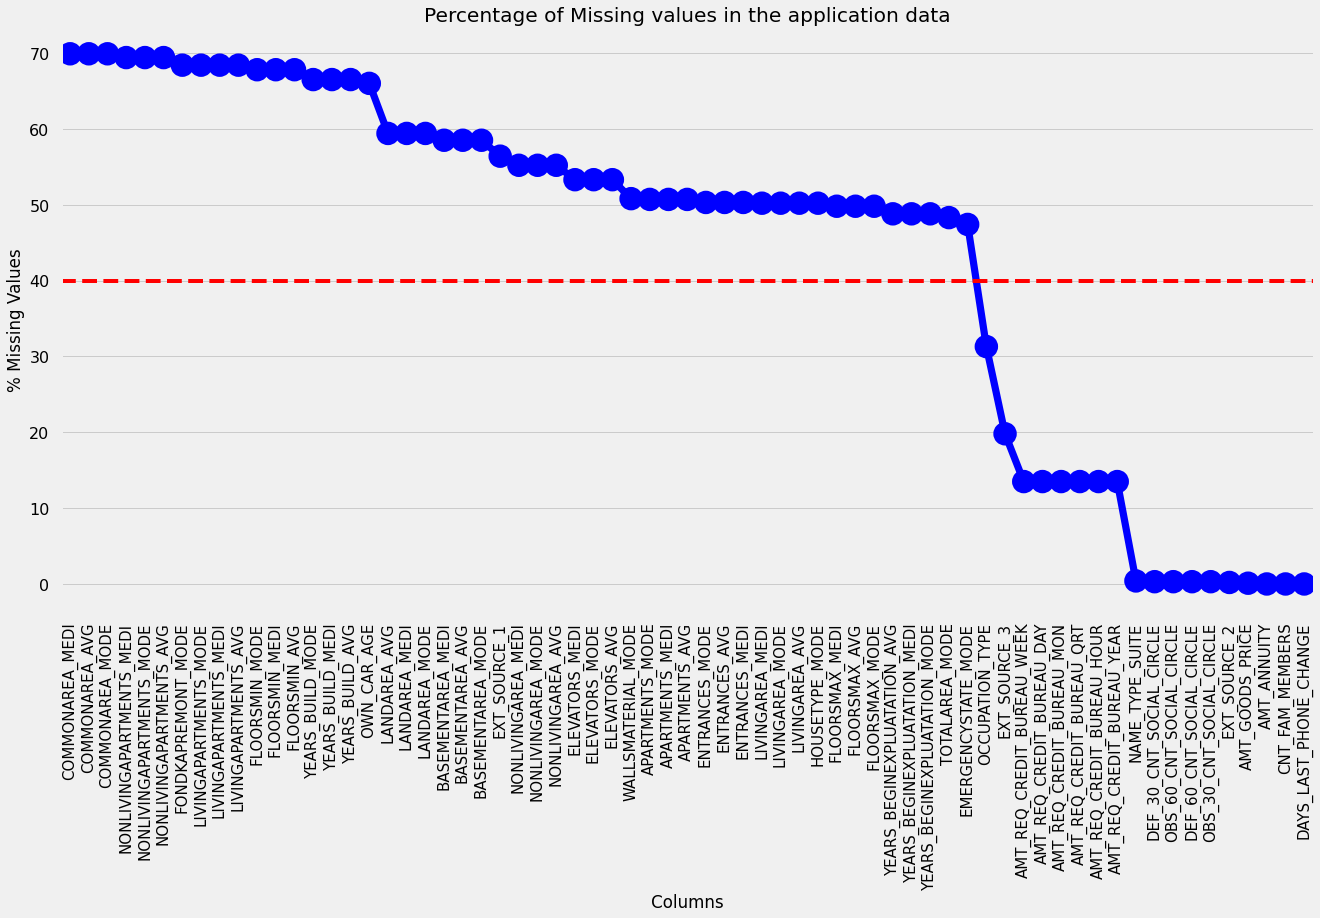

In [9]:
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(x = missing_df.index,
                   y = "% Missing Values",
                   data = missing_df,
                   color = 'blue')
plt.xticks(rotation=90, 
           fontsize =7)
ax.axhline(40, 
           ls ='--', 
           color = 'red')
plt.title("Percentage of Missing values in the application data")
plt.ylabel("% Missing Values")
plt.xlabel("Columns")
plt.xticks(fontsize=15, rotation=90)
plt.show()

#### Insight

From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values

In [10]:
threshold_missing_percent = 40
missing_gt_thresh_df = missing_df[missing_df["% Missing Values"] > threshold_missing_percent]
missing_gt_thresh_df

,Zero Values,Missing Values,% Missing Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
COMMONAREA_MEDI,8691,214865,69.9,223556,72.7,float64
COMMONAREA_AVG,8442,214865,69.9,223307,72.6,float64
COMMONAREA_MODE,9690,214865,69.9,224555,73.0,float64
NONLIVINGAPARTMENTS_MEDI,56097,213514,69.4,269611,87.7,float64
NONLIVINGAPARTMENTS_MODE,59255,213514,69.4,272769,88.7,float64
NONLIVINGAPARTMENTS_AVG,54549,213514,69.4,268063,87.2,float64
FONDKAPREMONT_MODE,0,210295,68.4,210295,68.4,object
LIVINGAPARTMENTS_MODE,519,210199,68.4,210718,68.5,float64
LIVINGAPARTMENTS_MEDI,433,210199,68.4,210632,68.5,float64
LIVINGAPARTMENTS_AVG,418,210199,68.4,210617,68.5,float64


In [11]:
missing_gt_thresh_df.shape

(49, 6)

#### Insight
Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

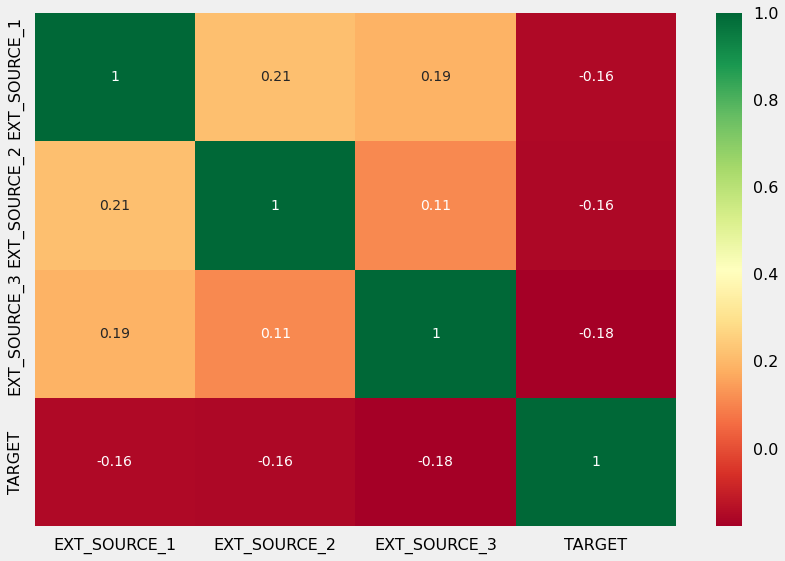

In [12]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
source_df = df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = source_df.corr()
ax = sns.heatmap(source_corr,
                 xticklabels=source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot = True,
                 cmap ="RdYlGn")

#### Insight
Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [13]:
# Create a list of columns that needs to be dropped including the columns 
# with >40% null values
irrelevant_columns = missing_gt_thresh_df.index.tolist() + ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in irrelevant_columns 

print(f"Irrelevant colmuns to be removed: {len(irrelevant_columns)}")

Irrelevant colmuns to be removed: 51


### Analyzing the "FLAG_DOCUMENTS_X" (X in 2 and 21) columns
- There are 20 columns for 'FLAG_DOCUMENT_X', as these are binary flags.
- Checking the relevance of Flag_Document and whether it has any relation with loan repayment status

In [14]:
# Creating a list with the attribute name starting "FLAG_DOCUMENT_"
flag_docs_cols = [col for col in df.columns if col.startswith("FLAG_DOCUMENT_")]
print(flag_docs_cols)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


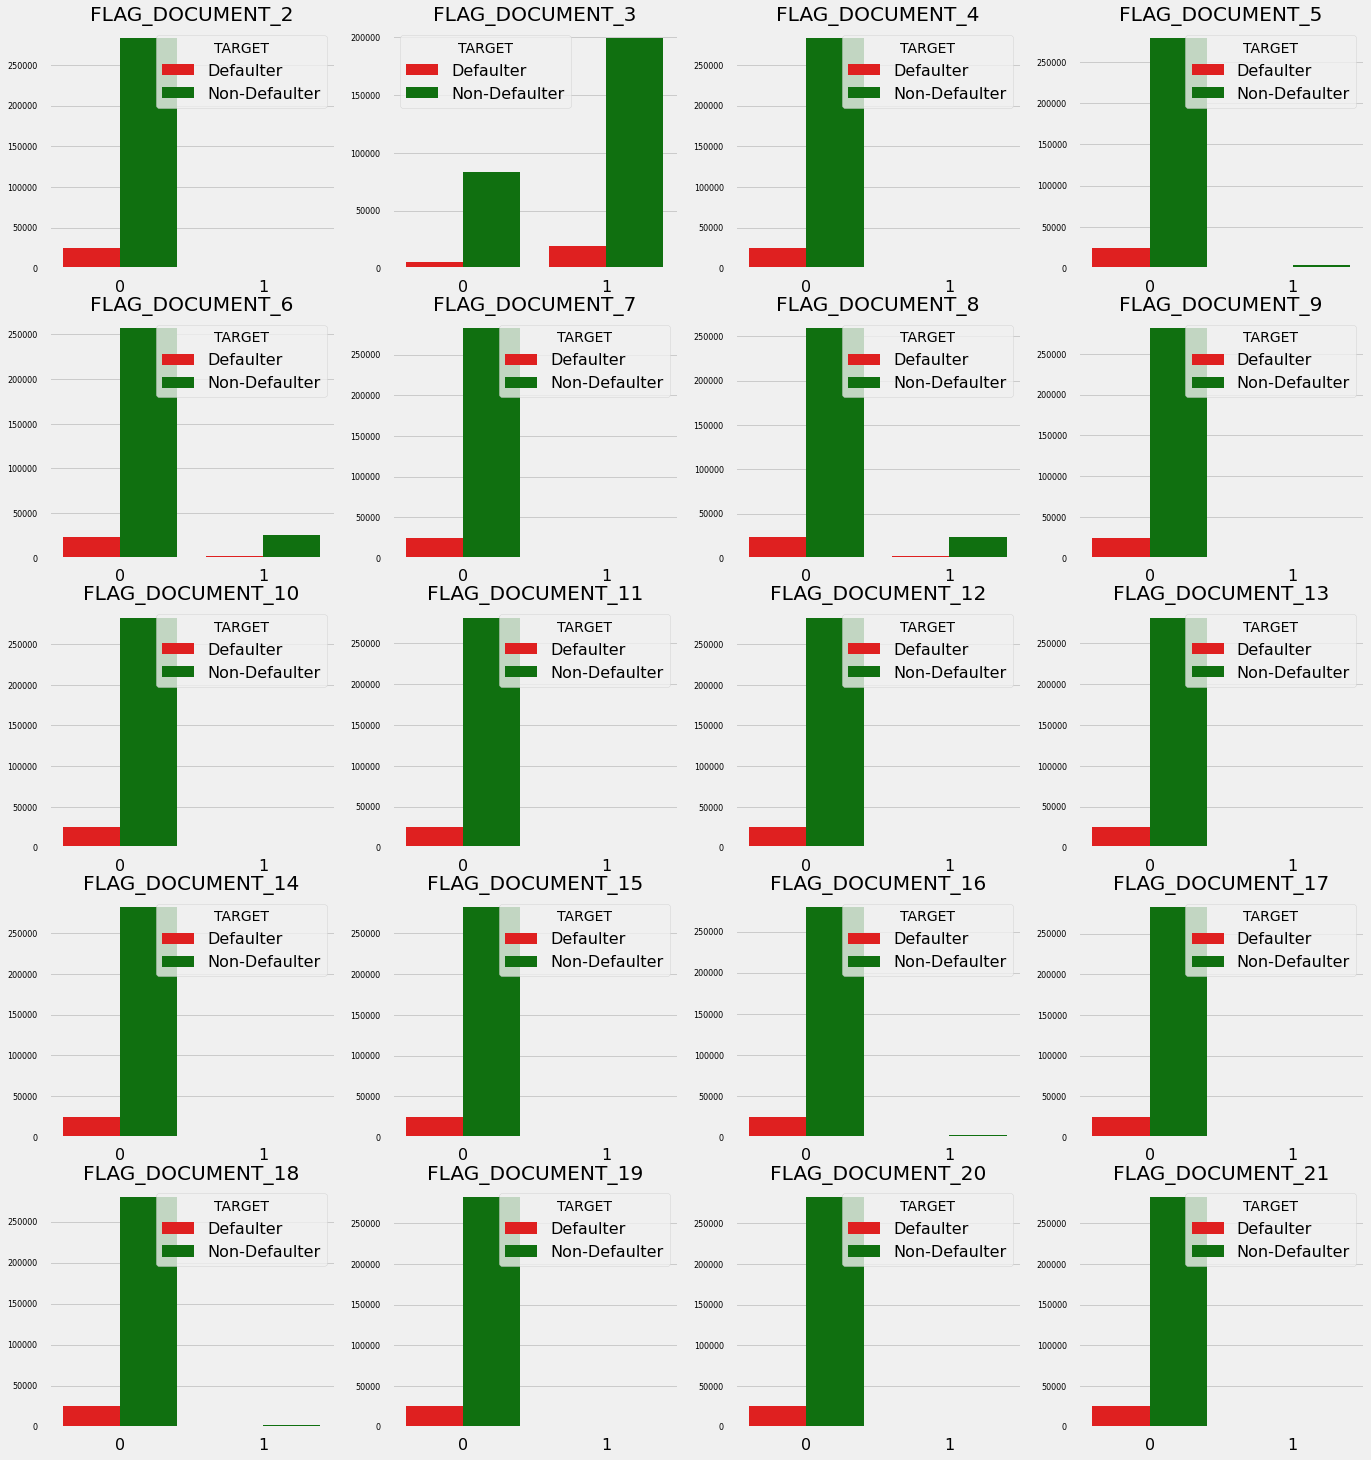

In [15]:
df_flag = df[flag_docs_cols+["TARGET"]]

length = len(flag_docs_cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter", 
                                               0:"Non-Defaulter"})

fig = plt.figure(figsize=(21,24))

for i,j in zip_longest(flag_docs_cols, range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],
                       hue=df_flag["TARGET"],
                       palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### Insight
The above graphs shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [16]:
# Including the flag documents for dropping the Document columns

flag_docs_cols.remove('FLAG_DOCUMENT_3') 
irrelevant_columns.extend(flag_docs_cols)
print(f"Irrelevant colmuns to be removed: {len(irrelevant_columns)}")

Irrelevant colmuns to be removed: 70


#### Missing value analysis
There about 67 columns that have Missing values and 49 of them have more than 45% missing values.
- We should get better understanding of the business importance of these columns.
- The EXT_SOURCE_1 has about 56% of missing value whereas a similar column EXT_SOURCE_2 has about 0.2% missing values. 
- As we don't have a business udnerstanding as to the weightage of these columns we can't be sure to drop the columns just based on missing value count.

### Imputing NaN's and Incorrect Values
#### Replacing Categorical Variables

In [17]:
df.OCCUPATION_TYPE.value_counts(dropna=False, normalize=True) * 100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [18]:
df.OCCUPATION_TYPE.fillna('Unknown', inplace=True)
df.OCCUPATION_TYPE.value_counts(dropna = False, normalize=True) * 100

Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

The following numerical columns have NaN's that can be replaced with 0 as that makes more sense based on the column descriptions

- DAYS_REGISTRATION
- CNT_FAM_MEMBERS
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [19]:
df.DAYS_REGISTRATION.fillna(0, inplace=True)
df.CNT_FAM_MEMBERS.fillna(0, inplace=True)
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

### Converting Datatypes

In [20]:
data_types = ["int64", "float64", "object"]
for dt in data_types:
    print(f"Data Type ({dt}): {df.select_dtypes(dt).shape[1]}")

Data Type (int64): 41
Data Type (float64): 65
Data Type (object): 16


In [21]:
df.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Categorical Attributes

The following columns with object data_types can be converted to numerical types (1, 0) instead of ("Y", "N"), making it beneficial for our analysis.
- FLAG_OWN_CAR
- FLAG_OWN_REALTY

In [22]:
# Converting the aforementioned categorical object type to numeric type. 
# Assuming the value of 1 refers to "Yes" and 0 refers to "No"

df.FLAG_OWN_CAR.replace("Y", 1, inplace=True)
df.FLAG_OWN_CAR.replace("N", 0, inplace=True)

df.FLAG_OWN_REALTY.replace("Y", 1, inplace=True)
df.FLAG_OWN_REALTY.replace("N", 0, inplace=True)

#### Converting float type to int for attributes that makes more int
The following columns would make more sense as 'int' datatypes:
- DAYS_REGISTRATION
- CNT_FAM_MEMBERS
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [23]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.astype(int)
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype(int)
df.OBS_30_CNT_SOCIAL_CIRCLE = df.OBS_30_CNT_SOCIAL_CIRCLE.astype(int)
df.DEF_30_CNT_SOCIAL_CIRCLE = df.DEF_30_CNT_SOCIAL_CIRCLE.astype(int)
df.OBS_60_CNT_SOCIAL_CIRCLE = df.OBS_60_CNT_SOCIAL_CIRCLE.astype(int)
df.DEF_60_CNT_SOCIAL_CIRCLE = df.DEF_60_CNT_SOCIAL_CIRCLE.astype(int)

#### Converting Negetive Values to Positives

These columns have negative value to signify reltaivity. Will convert them to positive values for better analysis.

In [24]:
# Converting "DAYS_BIRTH" to "AGE" by dividing by (taking into consideration leap year) will be useful later
df.DAYS_BIRTH = abs(df.DAYS_BIRTH//365.25)
# Renaming "DAYS_BIRTH" to "AGE" to make more sense
df.rename(columns = {'DAYS_BIRTH': 'AGE'}, inplace = True)

In [25]:
# Converting "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH" and 
# "DAYS_LAST_PHONE_CHANGE" to it's respectful absolute value
df.DAYS_EMPLOYED = abs(df.DAYS_EMPLOYED)
df.DAYS_REGISTRATION = abs(df.DAYS_REGISTRATION)
df.DAYS_ID_PUBLISH = abs(df.DAYS_ID_PUBLISH)
df.DAYS_LAST_PHONE_CHANGE = abs(df.DAYS_LAST_PHONE_CHANGE)

### Contact Parameters
Checking if there is any correlation between mobile phone, work phone etc, email, Family members and Region rating

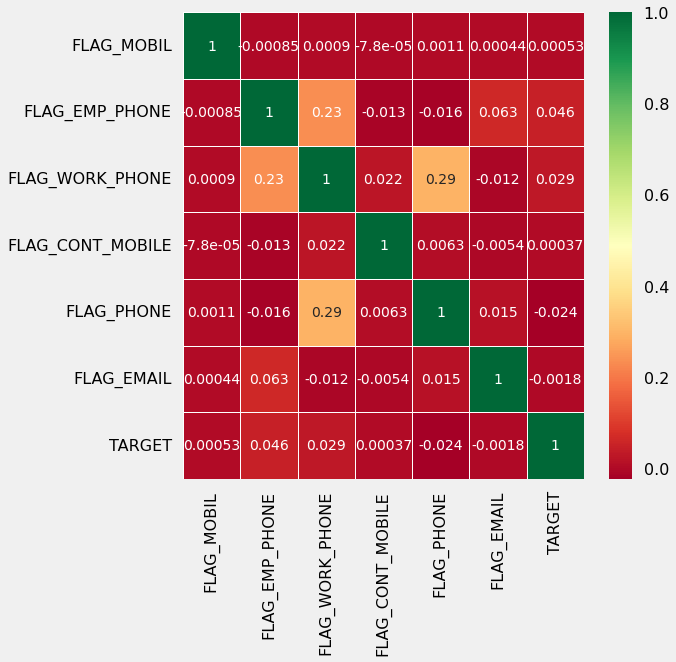

In [26]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
                 xticklabels=Contact_corr.columns,
                 yticklabels=Contact_corr.columns,
                 annot = True,
                 cmap ="RdYlGn",
                 linewidth=1)
plt.show()

#### Insight
There seems to be very low to no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [27]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
irrelevant_columns.extend(contact_col)
print(f"Irrelevant colmuns to be removed: {len(irrelevant_columns)}")

Irrelevant colmuns to be removed: 76


### Dropping irrelevant columns

In [28]:
# Dropping the unnecessary columns from df
df.drop(labels=irrelevant_columns,
        axis=1,
        inplace=True)

# Inspecting the dataframe after removal of unnecessary columns
print(f"Shape of Dataframe after removing irrelevant coluns: {df.shape}")

Shape of Dataframe after removing irrelevant coluns: (307511, 46)


In [29]:
# inspecting the column types after removal of unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Insight
After deleting unnecessary columns, there are 46 columns remaining in df.

### Sourcing and Processing the "previous_application.csv" dataset

In [30]:
prev_df = pd.read_csv("previous_application.csv")

In [31]:
missing_prev_df = describe_missing_zeros_values(prev_df)
display(missing_prev_df)

Your selected dataframe has 1670214 rows 37 columns.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% Missing Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
RATE_INTEREST_PRIMARY,0,1664263,99.6,1664263,99.6,float64
RATE_INTEREST_PRIVILEGED,0,1664263,99.6,1664263,99.6,float64
AMT_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
RATE_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
NAME_TYPE_SUITE,0,820405,49.1,820405,49.1,object
DAYS_FIRST_DRAWING,0,673065,40.3,673065,40.3,float64
DAYS_FIRST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_LAST_DUE_1ST_VERSION,705,673065,40.3,673770,40.3,float64
DAYS_LAST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_TERMINATION,0,673065,40.3,673065,40.3,float64


There are many columns in previous application dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

#### Insights
From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values

### Data Binning

#### Binning "AMT_INCOME_TOTAL" to 5 bins ["VeryLow", "Low", "Medium", "High", "VeryHigh"]


In [32]:
# Using qcut to get relatively equally proportioned bins
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
df['AMT_INCOME_TOTAL']=df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['Below 100K','100K-200K', '200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','900K-1M', 'Above 1M']

df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'],
                                bins,
                                labels=slot)

df.AMT_INCOME_RANGE.value_counts(normalize = True) * 100

100K-200K     50.735000
200K-300K     21.210691
Below 100K    20.729695
300K-400K      4.776116
400K-500K      1.744669
500K-600K      0.356354
600K-700K      0.282805
800K-900K      0.096980
700K-800K      0.052721
900K-1M        0.009112
Above 1M       0.005858
Name: AMT_INCOME_RANGE, dtype: float64

#### Insight
More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

### Binning "AGE" to 5 equally spaced bins

In [33]:
# Creating bins for Age
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','Above 50']

df['AGE_GROUP'] = pd.cut(df['AGE'],
                         bins=bins,
                         labels=slots)
df.AGE_GROUP.value_counts(normalize = True) * 100

Above 50    33.623187
30-40       26.779205
40-50       24.903499
20-30       14.694109
0-20         0.000000
Name: AGE_GROUP, dtype: float64

#### Insight
- 33% loan applicants have age above 50 years. 
- More than 55% of loan applicants have age over 40 years.

In [34]:
# Creating bins for Credit amount
df['AMT_CREDIT'] = df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['Below 100K', '100K-200K', '200K-300K', '300K-400K',
         '400K-500K', '500K-600K', '600K-700K', '700K-800K',
         '800K-900K', '900K-1M', 'Above 1M']

df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'],
                                bins=bins,
                                labels=slots)

In [35]:
df.AMT_CREDIT_RANGE.value_counts(normalize=True)*100

200K-300K     17.824728
Above 1M      16.254703
500K-600K     11.131960
400K-500K     10.418489
100K-200K      9.801275
300K-400K      8.564897
600K-700K      7.820533
800K-900K      7.086576
700K-800K      6.241403
900K-1M        2.902986
Below 100K     1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

#### Insight
About 16% loan applicants have taken loan which amounts to more than 1M.

In [36]:
# Creating bins for Employement Time
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5', '5-10', '10-20', '20-30',
         '30-40', '40-50', '50-60', 'Above 60']

df['EMPLOYMENT_YEAR_RANGE'] = pd.cut(df['YEARS_EMPLOYED'],
                                     bins=bins,
                                     labels=slots)

#checking the binning of data and % of data in each category
df.EMPLOYMENT_YEAR_RANGE.value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
Above 60     0.000000
Name: EMPLOYMENT_YEAR_RANGE, dtype: float64

#### Insight
- More than 55% of the loan applicants have work experience within 0-5 years.
- Almost 80% of them have less than 10 years of work experience

### Checking for Outliers

#### Outliers in application data dataframe

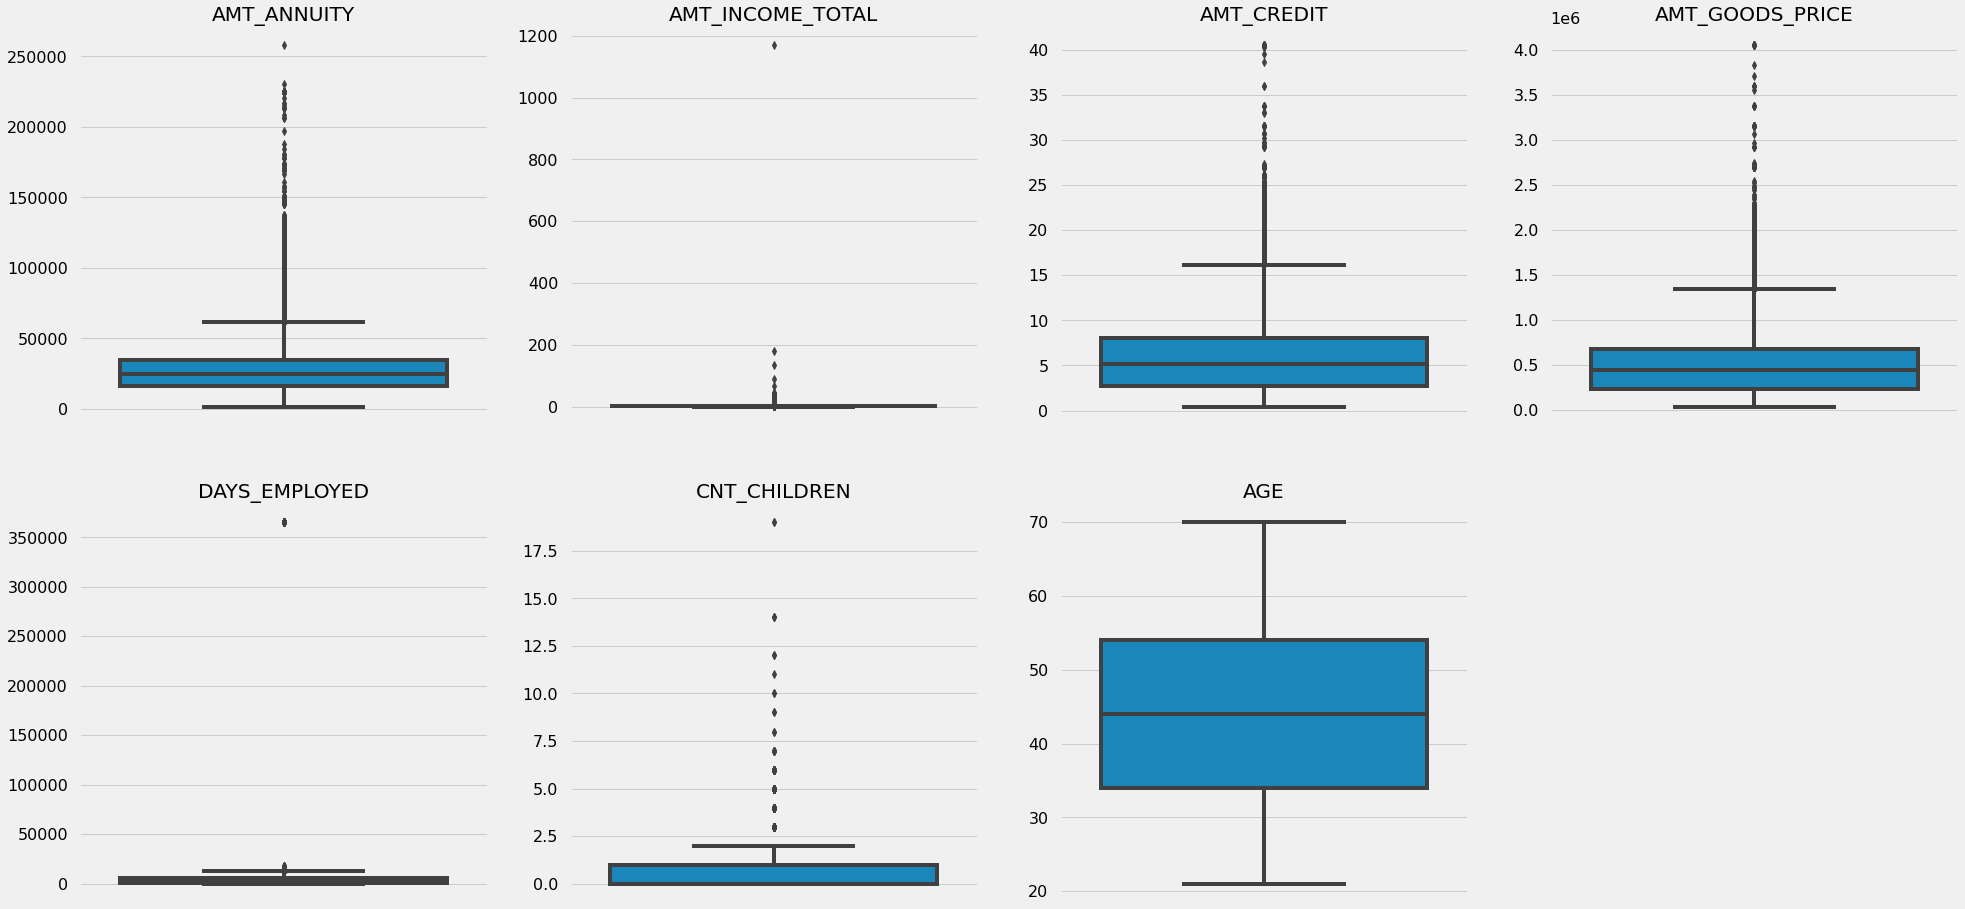

In [37]:
plt.figure(figsize=(30,15))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','AGE']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Insight
- It can be seen that in current application data
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
- AGE has no outliers which means the data available is reliable.
- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

#### Outliers in previous application dataframe

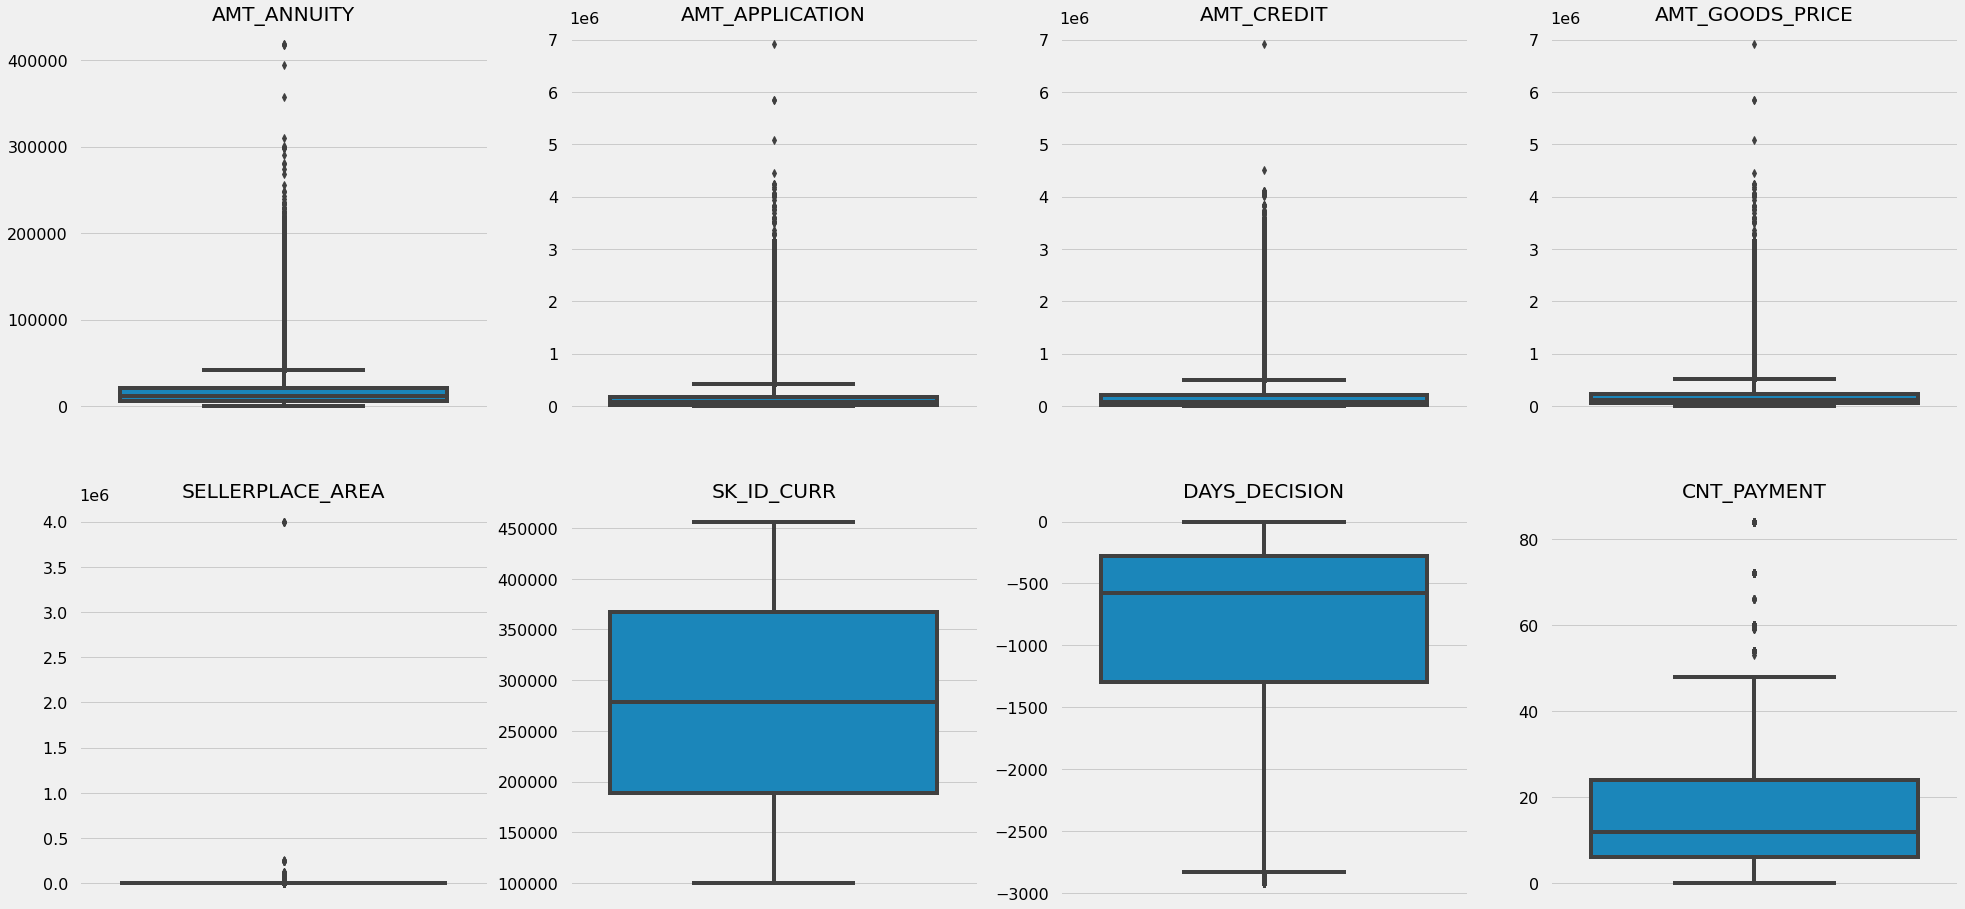

In [38]:
plt.figure(figsize=(30,15))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

#### Insight 
It can be seen that in previous application data
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has few outlier values.
- SK_ID_CURR is an ID column and hence no outliers.
- DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

### Adding New Features
    Adding new features based on exisitng features

#### Credit Ratios

In [39]:
df["CREDIT_TO_ANNUITY_RATIO"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]
df["CREDIT_TO_GOODS_RATIO"] = df["AMT_CREDIT"] / df["AMT_GOODS_PRICE"]

#### Income Ratios

In [40]:
df["ANNUITY_TO_INCOME_RATIO"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
df["CREDIT_TO_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["INCOME_TO_EMPLOYED_RATIO"] = df["AMT_INCOME_TOTAL"] / df["DAYS_EMPLOYED"]

## Data Analysis

### Strategy
The data analysis flow has been planned in following way :
- Imbalance in Data
- Categorical Data Analysis
    - Categorical segmented Univariate Analysis
    - Categorical Bi/Multivariate analysis
- Numeric Data Analysis
    - Bi-furcation of databased based on TARGET data
    - Correlation Matrix
    - Numerical segmented Univariate Analysis
    - Numerical Bi/Multivariate analysis

### Plotting Functions

In [41]:
def plot_box(data_series):
    """Plotting box plots
    
    Args:
        data_series (pd.core.series.Series): Data series to be plotted
    """
    plt.figure(figsize = (20,1))
    sns.boxplot(data_series)
    plt.show()

In [42]:
# Function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Non-Defaulter','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [43]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x, y, df, hue, figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                y=y,
                data=df, 
                hue=hue, 
                palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(f"{x} vs {y}", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Non-Defaulter','Defaulter'])
    plt.show()

In [44]:
# Function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x, y, data, hue, kind, palette, legend, figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [45]:
# Function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col, df, hue, palette, ylog, figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [46]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])

### Data Imablance

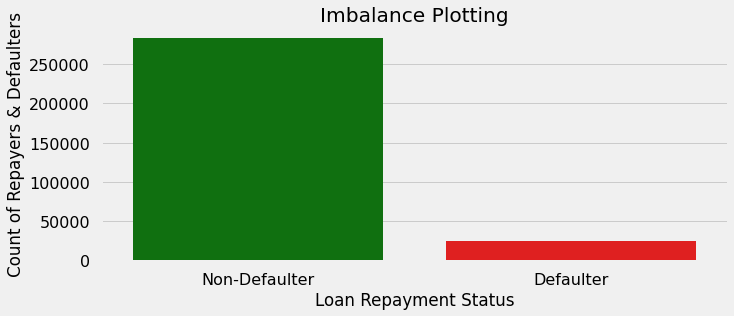

In [47]:
imbalance = df["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Non-Defaulter','Defaulter']
sns.barplot(x,
            "TARGET",
            data = imbalance,
            palette = ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

#### Checking for Outliers in "AMT_INCOME_TOTAL"

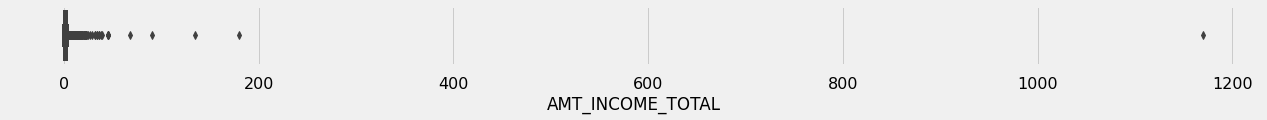

In [48]:
plot_box(df.AMT_INCOME_TOTAL)

- As we can see above there is atleast one significant outlier for "AMT_INCOME_TOTAL" which is a very important field to focus on.
- It would be better if these outliers are not taken into account during our analysis as it would skew the data towards the right.

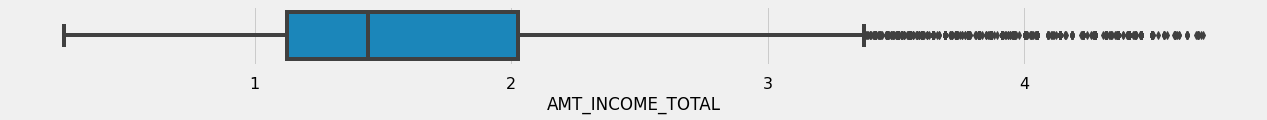

In [49]:
plot_box(df[df.AMT_INCOME_TOTAL < df.AMT_INCOME_TOTAL.quantile(0.99)].AMT_INCOME_TOTAL)

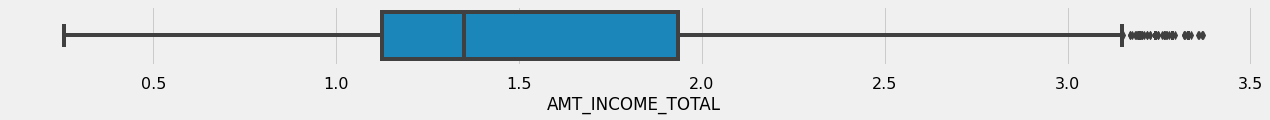

In [50]:
plot_box(df[df.AMT_INCOME_TOTAL < df.AMT_INCOME_TOTAL.quantile(0.95)].AMT_INCOME_TOTAL)

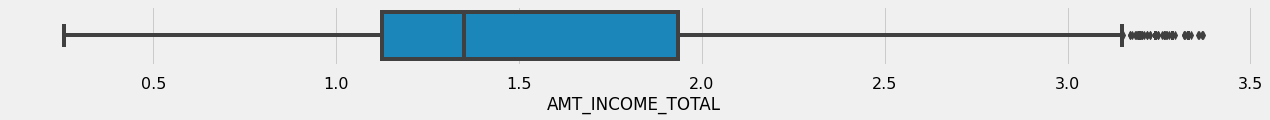

In [51]:
# Using data upto 95th quantile of the column to
df = df[df.AMT_INCOME_TOTAL < df.AMT_INCOME_TOTAL.quantile(0.95)]
plot_box(df.AMT_INCOME_TOTAL)

#### Checking for Outliers in "DAYS_EMPLOYED"

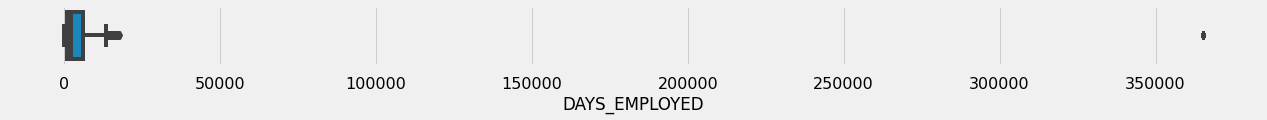

In [52]:
# DAYS_EMPLOYED provided in current application
plot_box(df.DAYS_EMPLOYED)

- Atleast one signigicant Outlier present
- Removing those and plotting again.....

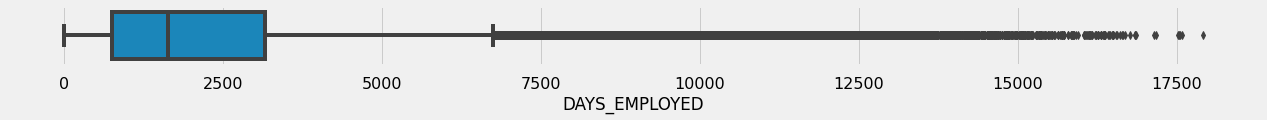

In [53]:
plot_box(df[df.DAYS_EMPLOYED < df.DAYS_EMPLOYED.quantile(0.95)].DAYS_EMPLOYED)

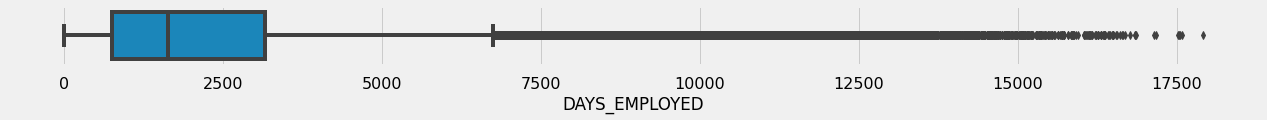

In [54]:
# Using data upto 95th quantile of the column and replotting
df = df[df.DAYS_EMPLOYED < df.DAYS_EMPLOYED.quantile(0.95)]
plot_box(df.DAYS_EMPLOYED)

### Univariate Analysis

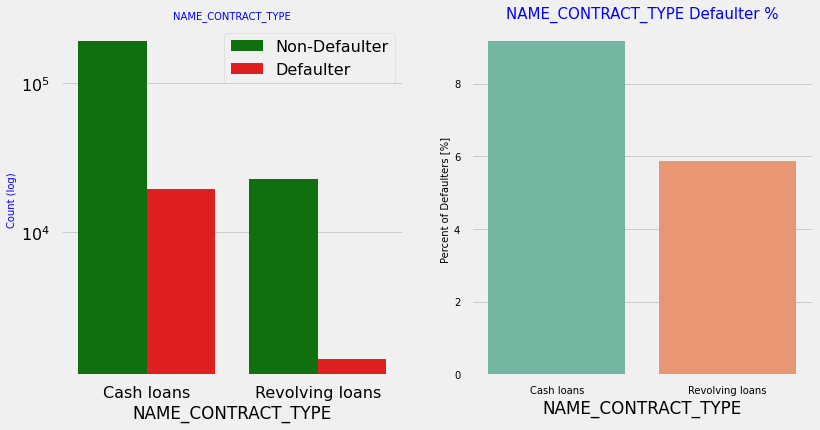

In [55]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE', True)

#### Insight
- Contract type: Revolving loans are just a small fraction (10%) from the total number of loans.
- In the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

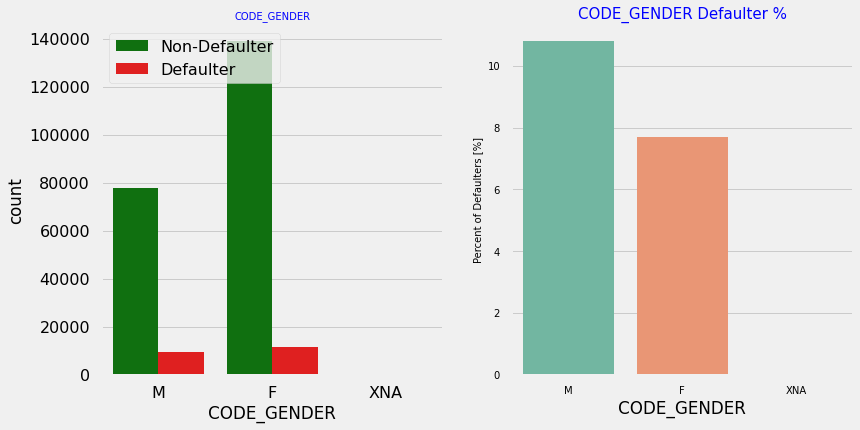

In [56]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

#### Insight
- The number of female clients is almost double the number of male clients. 
- Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (approx 10%), comparing with women (approx 7%)

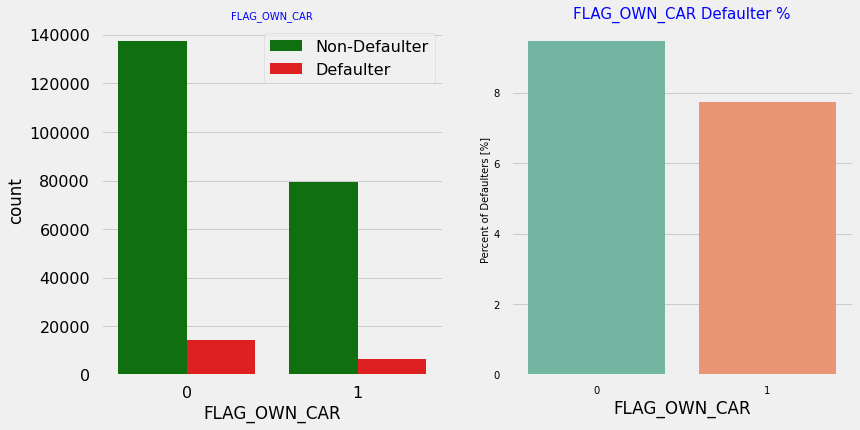

In [57]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

#### Insight
- Clients who own a car are half in number of the clients who dont own a car.
- But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

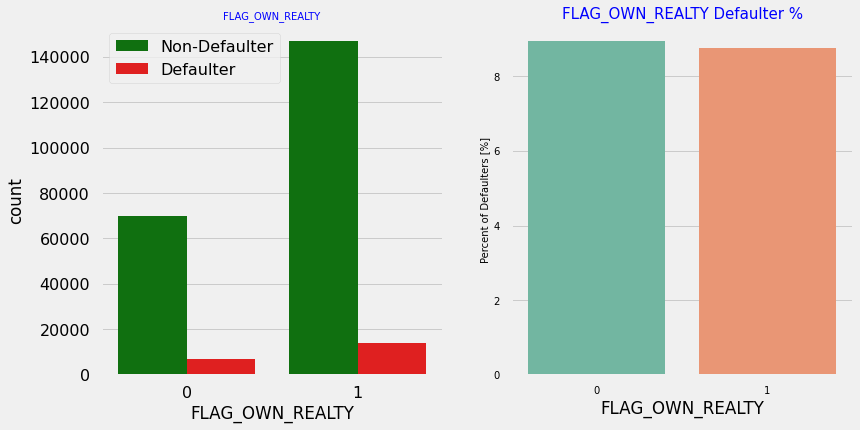

In [58]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

#### Insight
- The clients who own real estate are more than double of the ones that don't own. 
- But the defaulting rate of both categories are around the same (approx 8%). Thus there is no correlation between owning a reality and defaulting the loan.

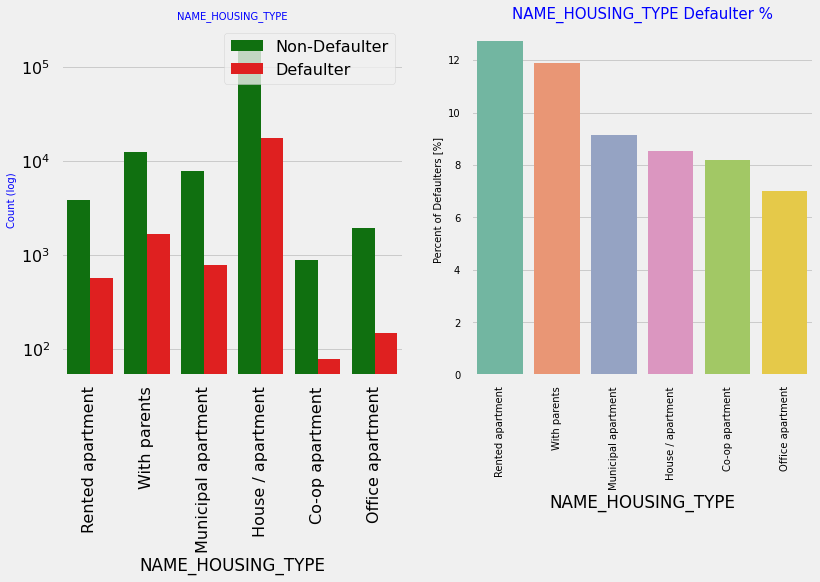

In [59]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE", True, True, True)

#### Insight
- Majority of people live in House/apartment
- People living in office apartments have lowest default rate
- People living with parents (approx 11.5%) and living in rented apartments(>12%) have higher probability of defaulting

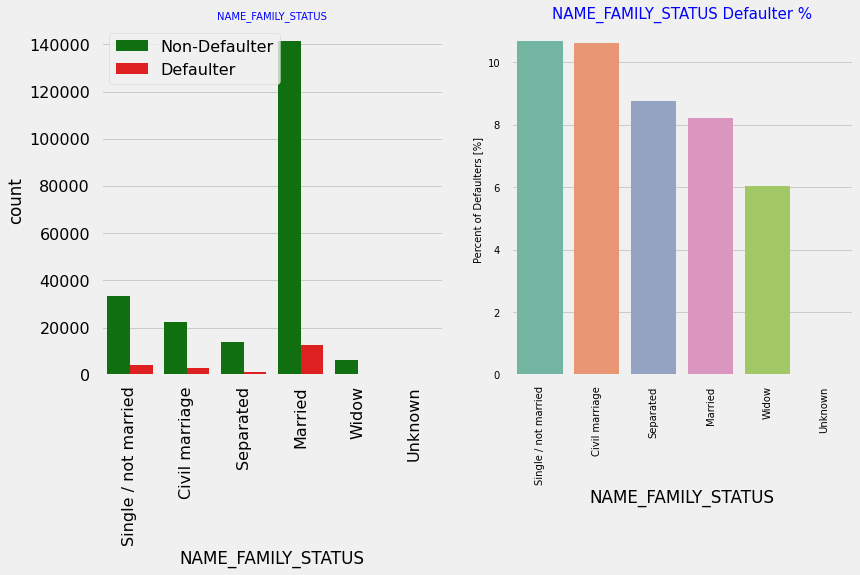

In [60]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS", False, True, True)

#### Insight
- Most of the people who have taken loan are married, followed by Single/not married and civil marriage.
- In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

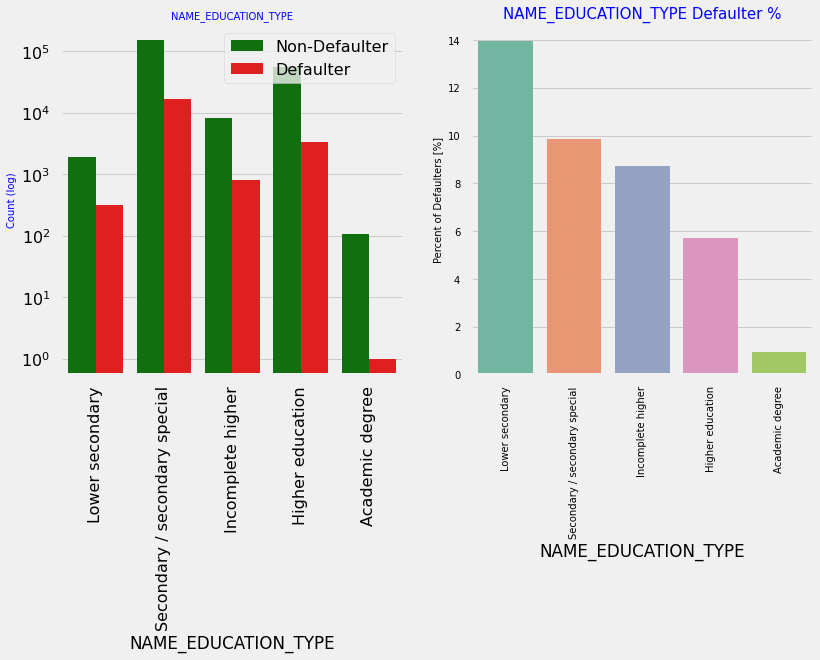

In [61]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE", True, True, True)

#### Insight
- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
- The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

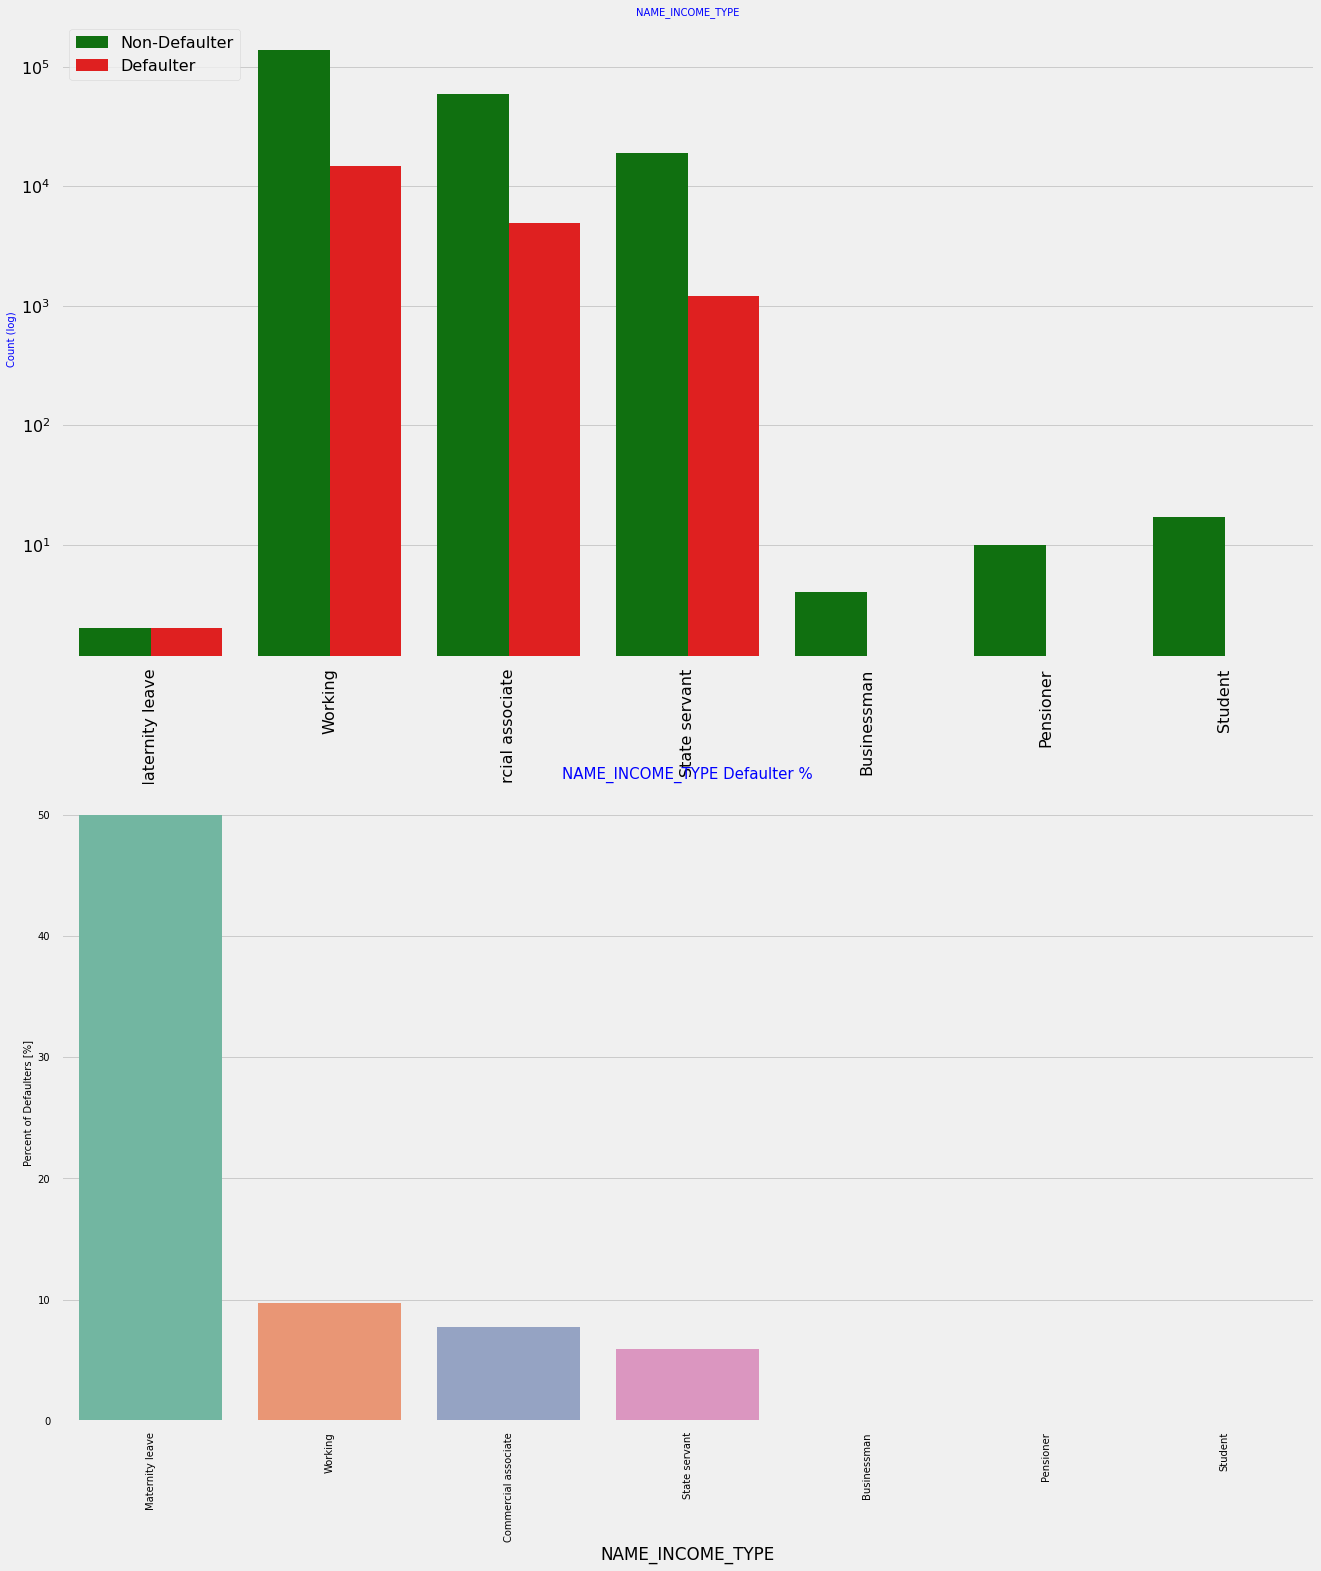

In [62]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE", True, True, False)

#### Insight
- Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
- The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
- Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

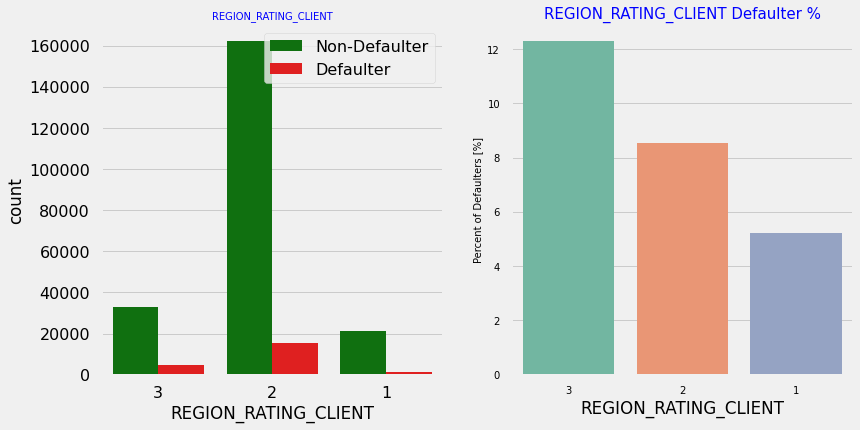

In [63]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT", False, False, True)

#### Insight
- Most of the applicants are living in Region_Rating 2 place.
- Region Rating 3 has the highest default rate (11%).
- Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans.

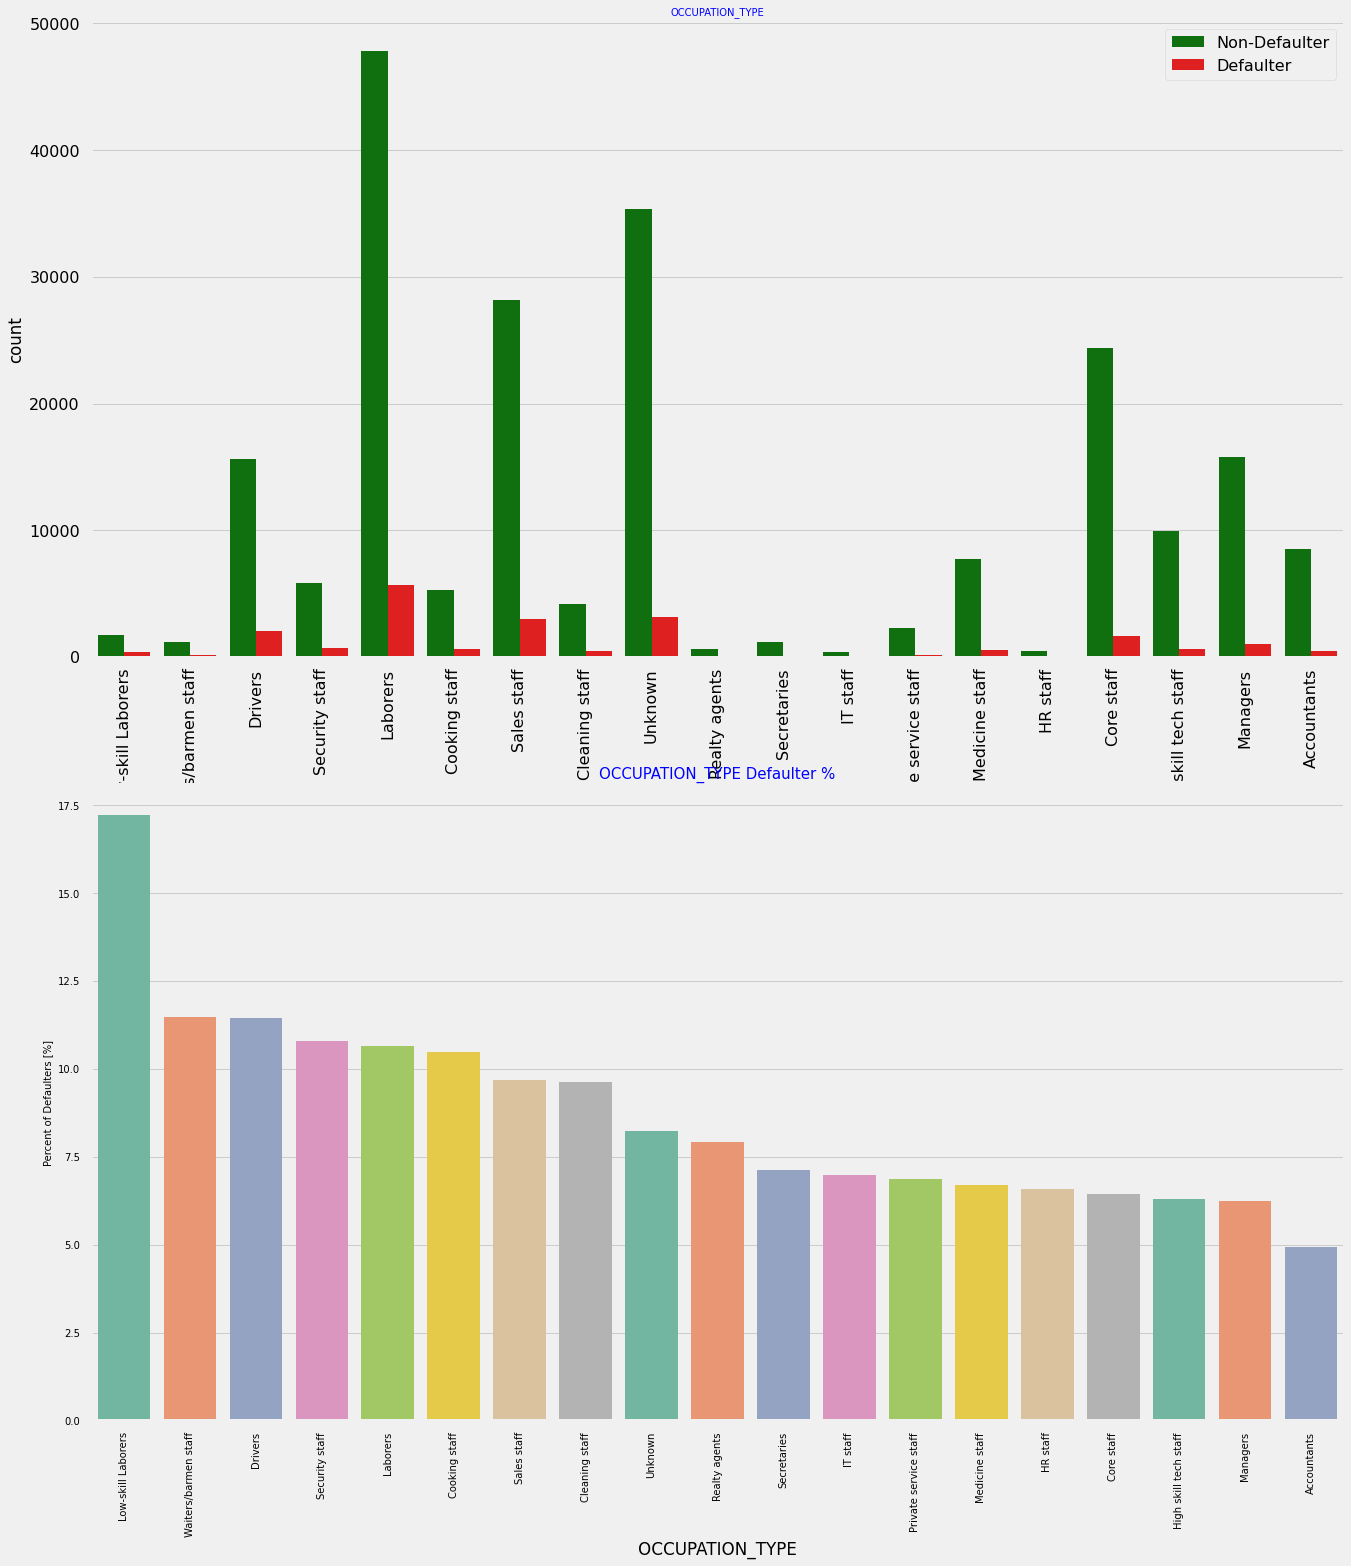

In [64]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE", False, True, False)

#### Insight
- Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
- The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

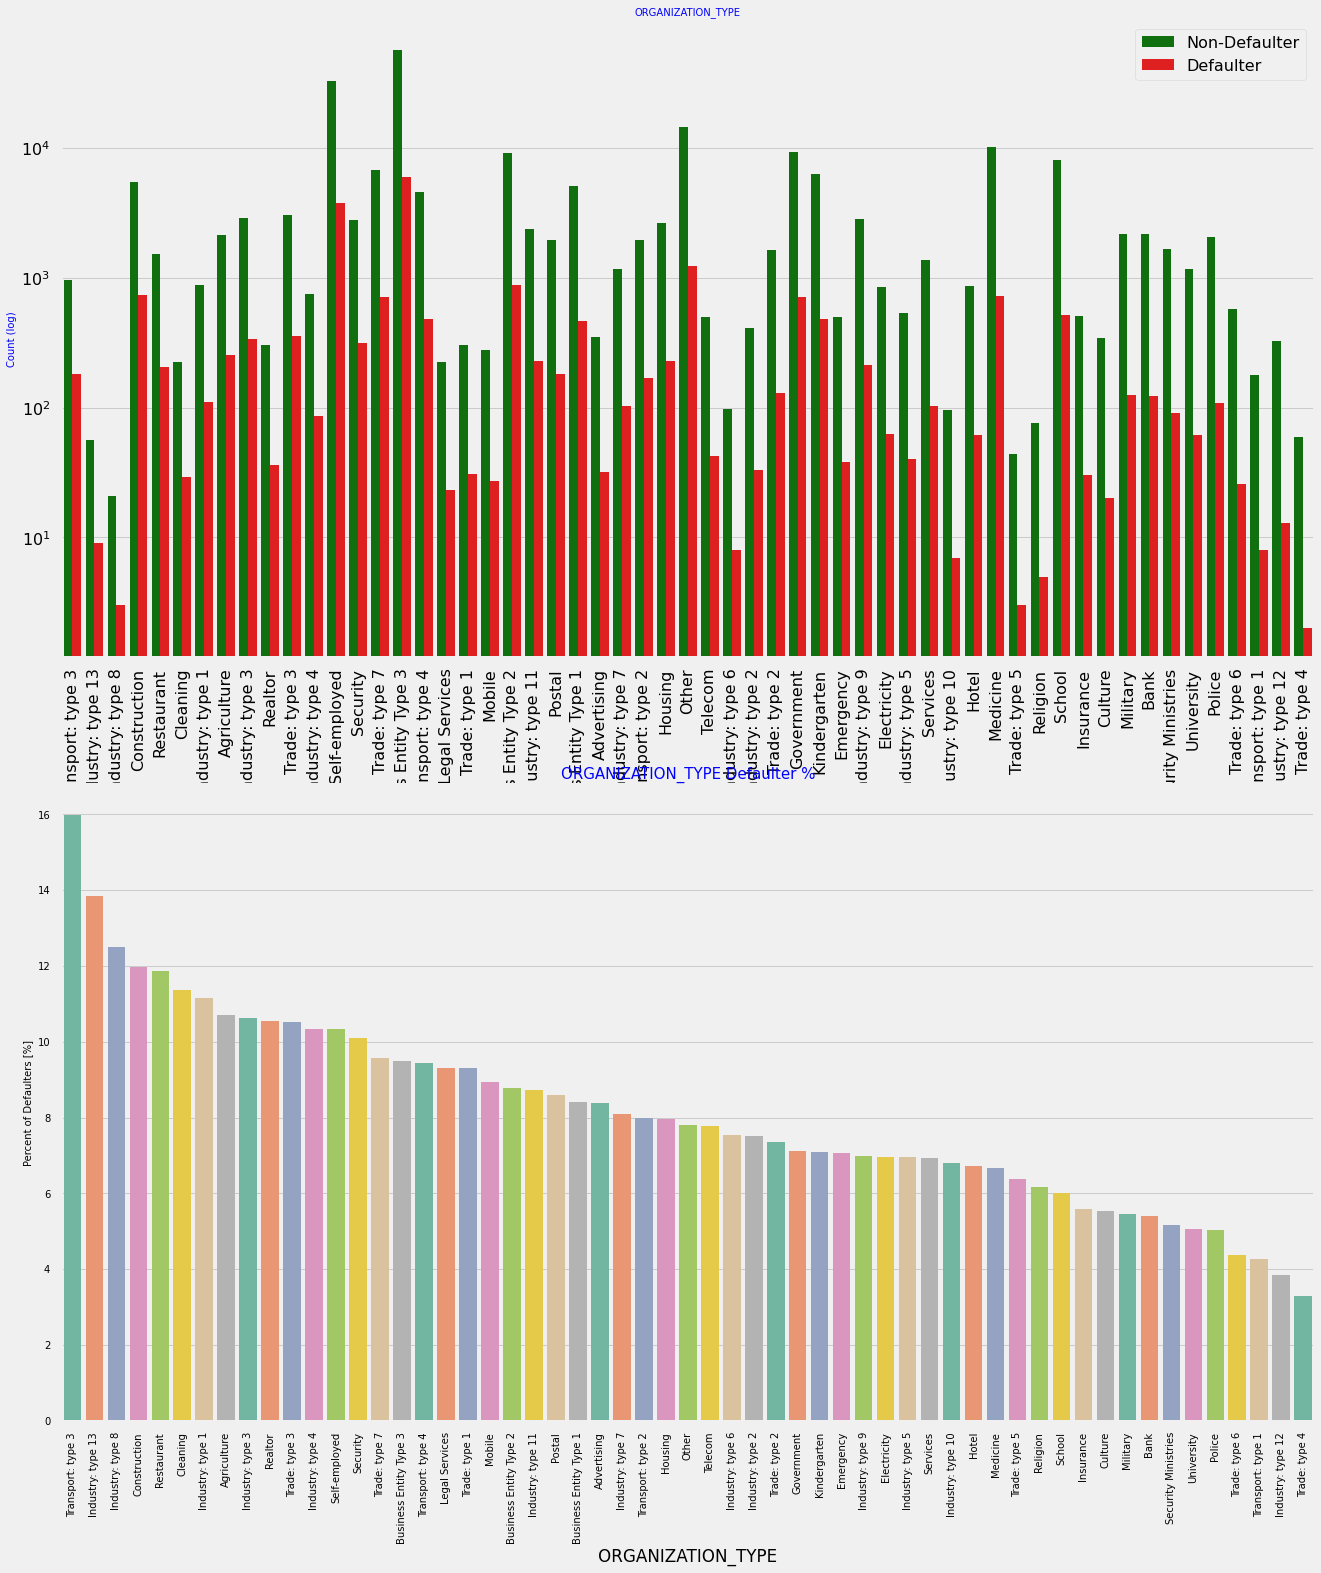

In [65]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE", True, True, False)

#### Insight
- Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
- Most of the people application for loan are from Business Entity Type 3
- For a very high number of applications, Organization type information is unavailable(XNA)


It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
- Trade Type 4 and 5
- Industry type 8

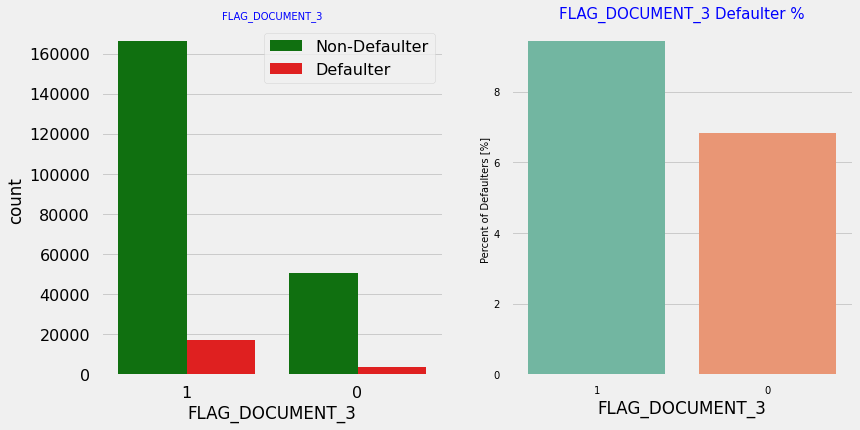

In [66]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3", False, False, True)

#### Insight
There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

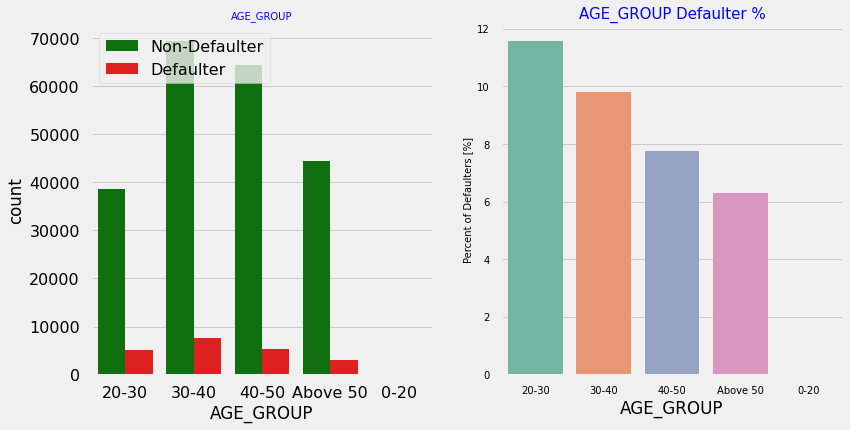

In [67]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP", False, False, True)

#### Insight
- People in the age group range 20-40 have higher probability of defaulting
- People above age of 50 have low probability of defailting

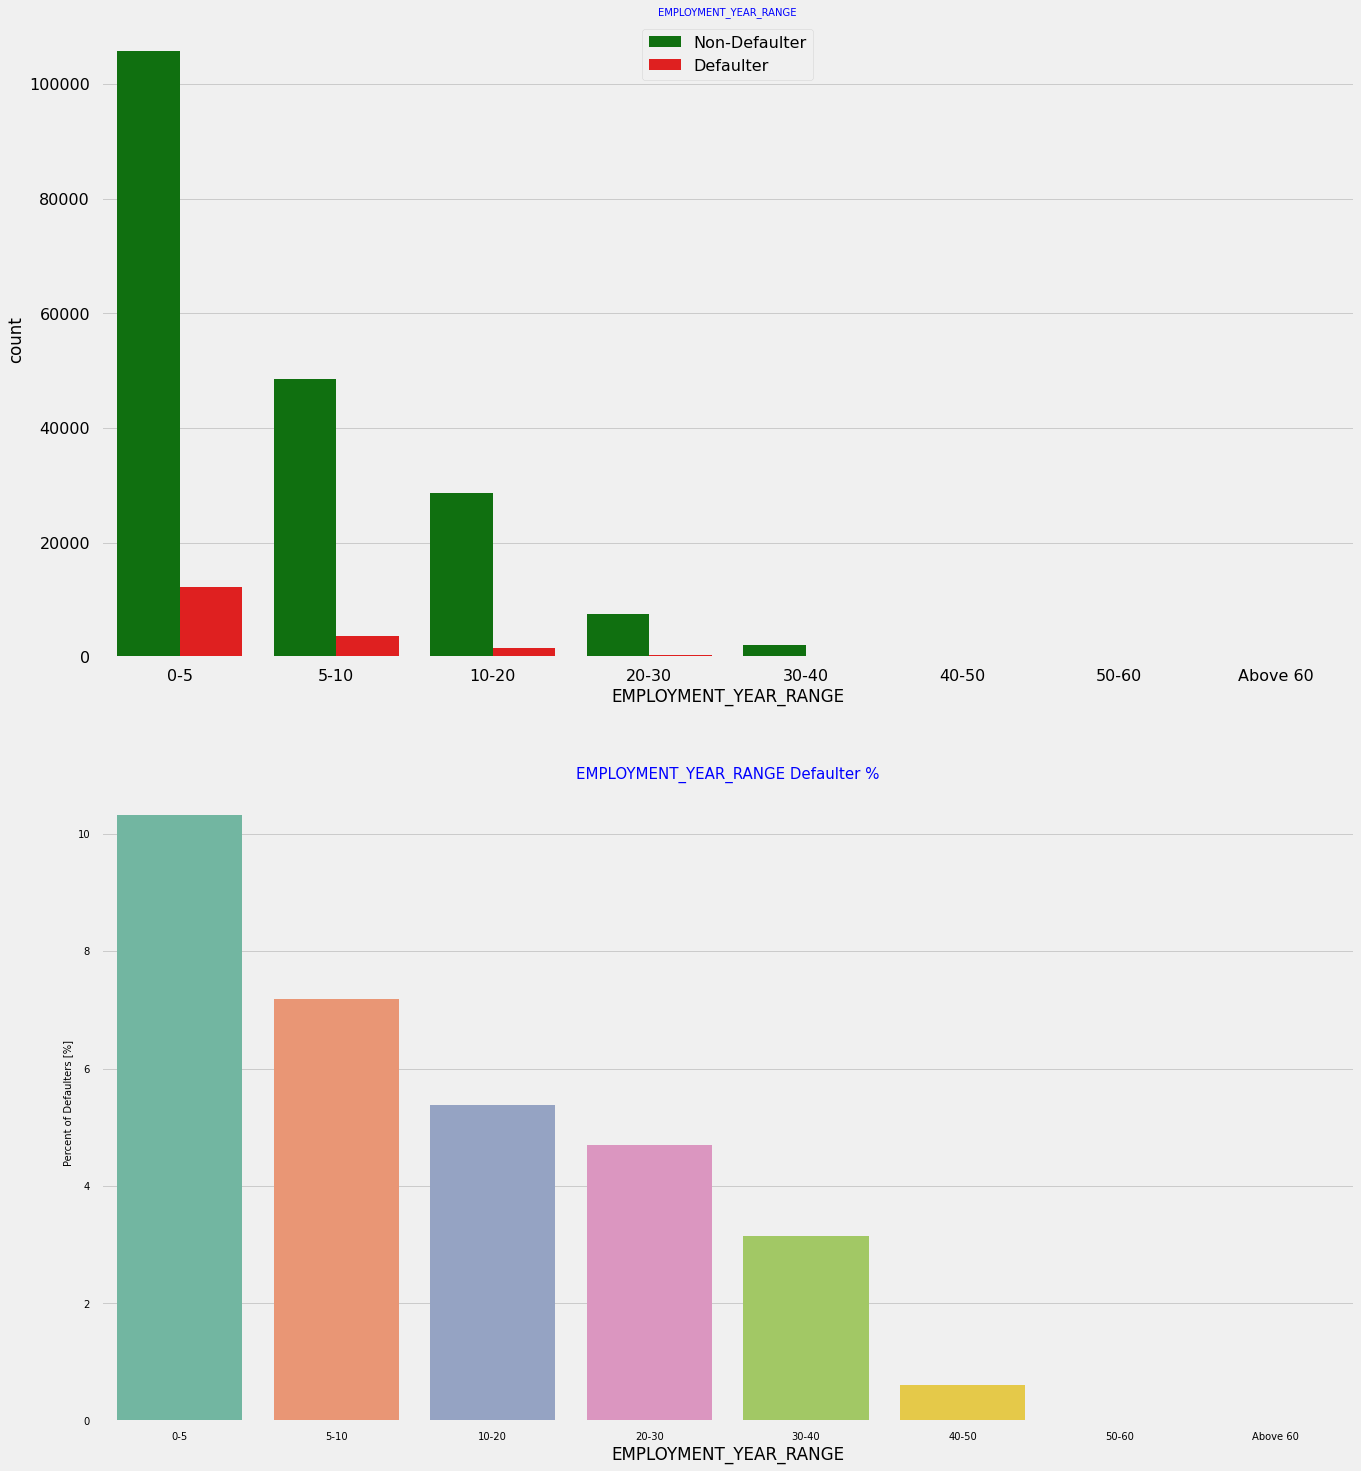

In [68]:
# Analyzing Employment_Year_Range based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR_RANGE", False, False, False)

#### Insight
- Majority of the applicants have been employed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
- With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

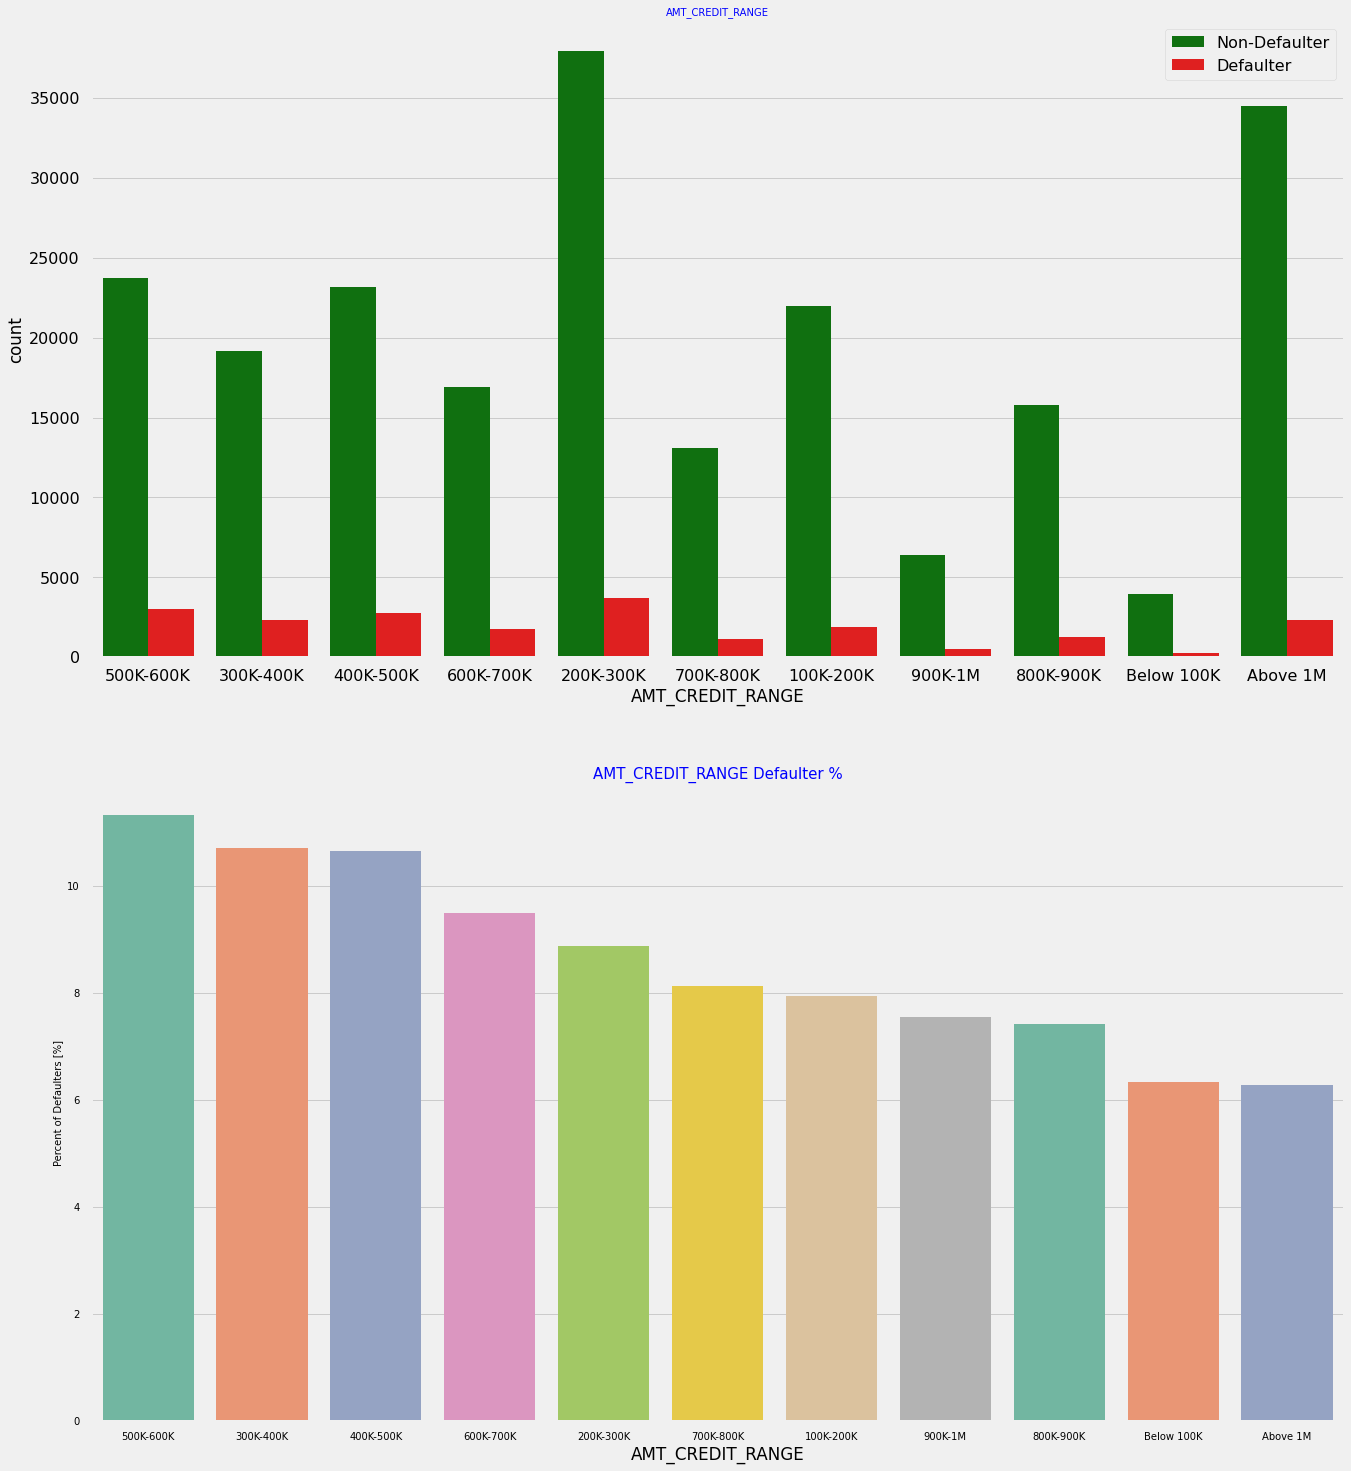

In [69]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE", False, False, False)

#### Insight
- More than 80% of the loan provided are for amount less than 900,000
- People who get loan for 200-600k tend to default more than others.

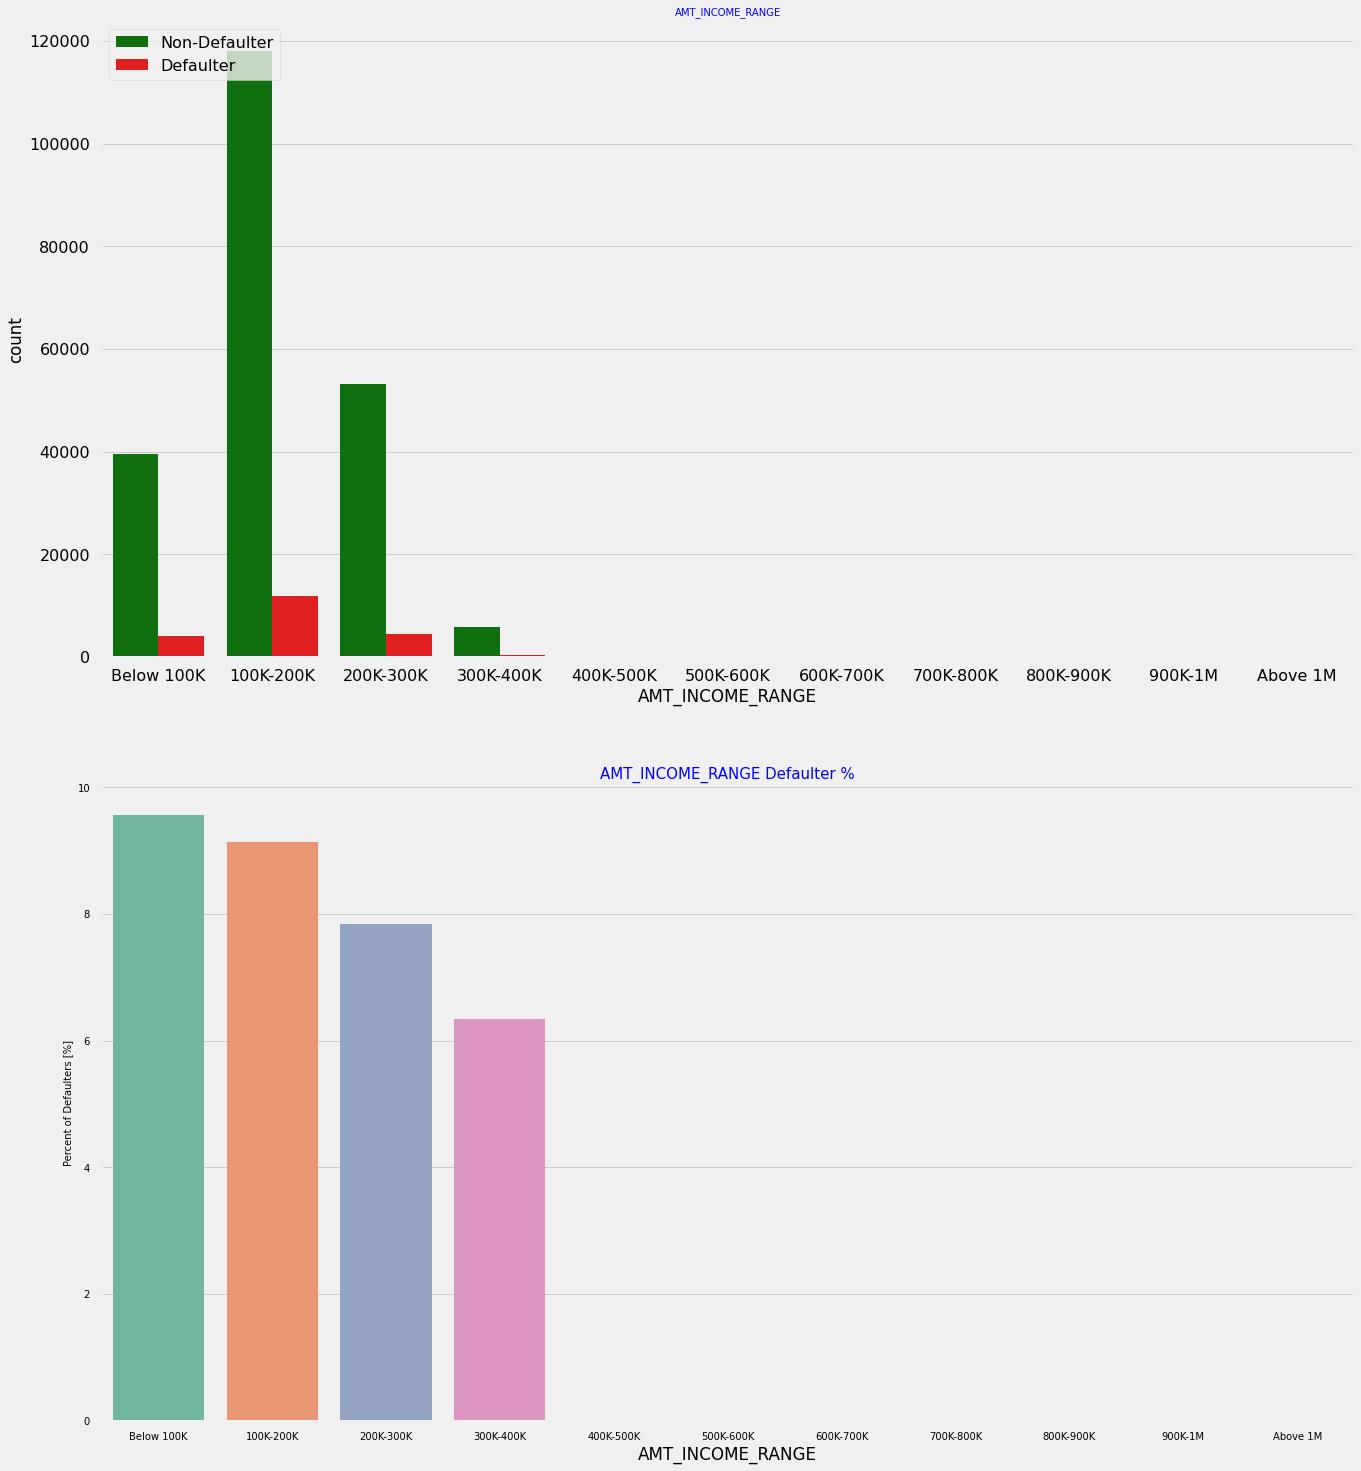

In [70]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE", False, False, False)

#### Insight
- 90% of the applications have Income total less than 300,000.
- Application with Income less than 300,000 has high probability of defaulting.
- Applicant with Income more than 700,000 are less likely to default.

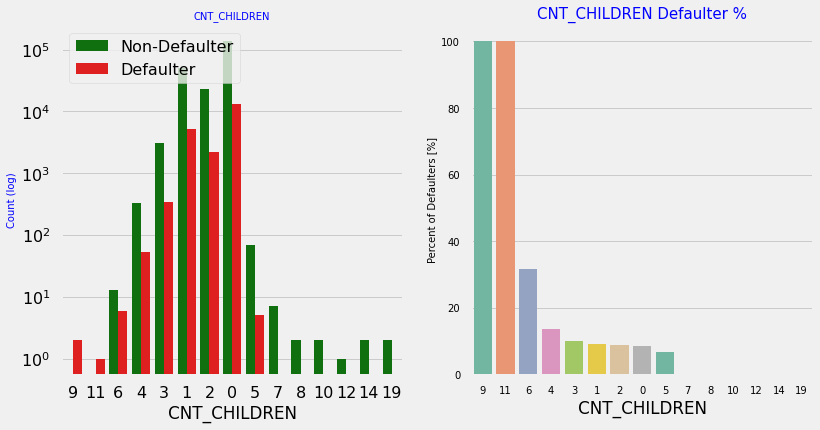

In [71]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN", True)

#### Insight
- Most of the applicants do not have children
- Very few clients have more than 3 children.
- Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate.

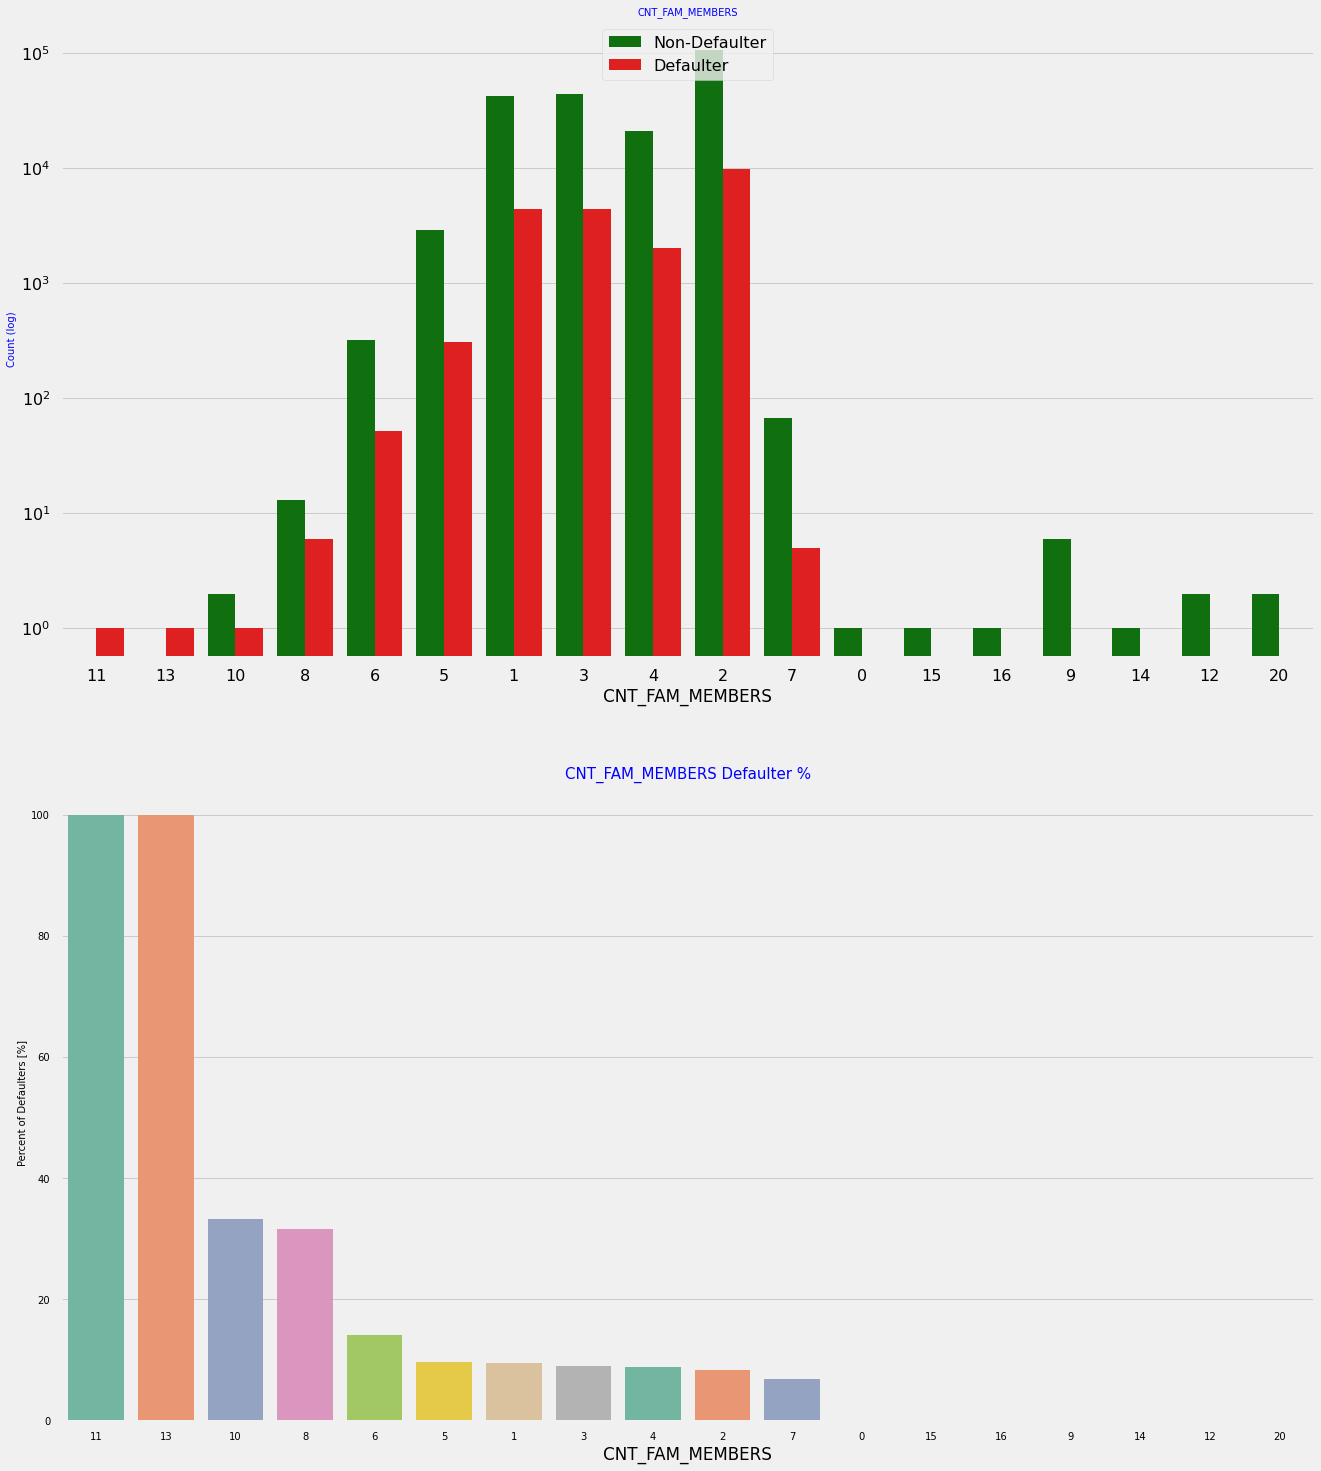

In [72]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS", True, False, False)

#### Insight
Family member follows the same trend as children where having more family members increases the risk of defaulting

### Bi/Multivariate Analysis

In [73]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,4.0,2.025000,0.259808,1.8000,1.800000,2.0250,2.25000,2.250000
Commercial associate,64450.0,1.736543,0.630424,0.2655,1.260000,1.6200,2.25000,3.370500
Maternity leave,4.0,0.855000,0.369256,0.4950,0.630000,0.7875,1.01250,1.350000
Pensioner,10.0,1.109250,0.352747,0.6750,0.815625,0.9900,1.45125,1.575000
State servant,20299.0,1.621083,0.646476,0.2700,1.125000,1.5750,2.02500,3.368359
Student,17.0,1.474412,0.437603,0.8100,1.125000,1.5750,1.75500,2.250000
Working,152768.0,1.516020,0.600069,0.2565,1.125000,1.3500,1.80000,3.330000


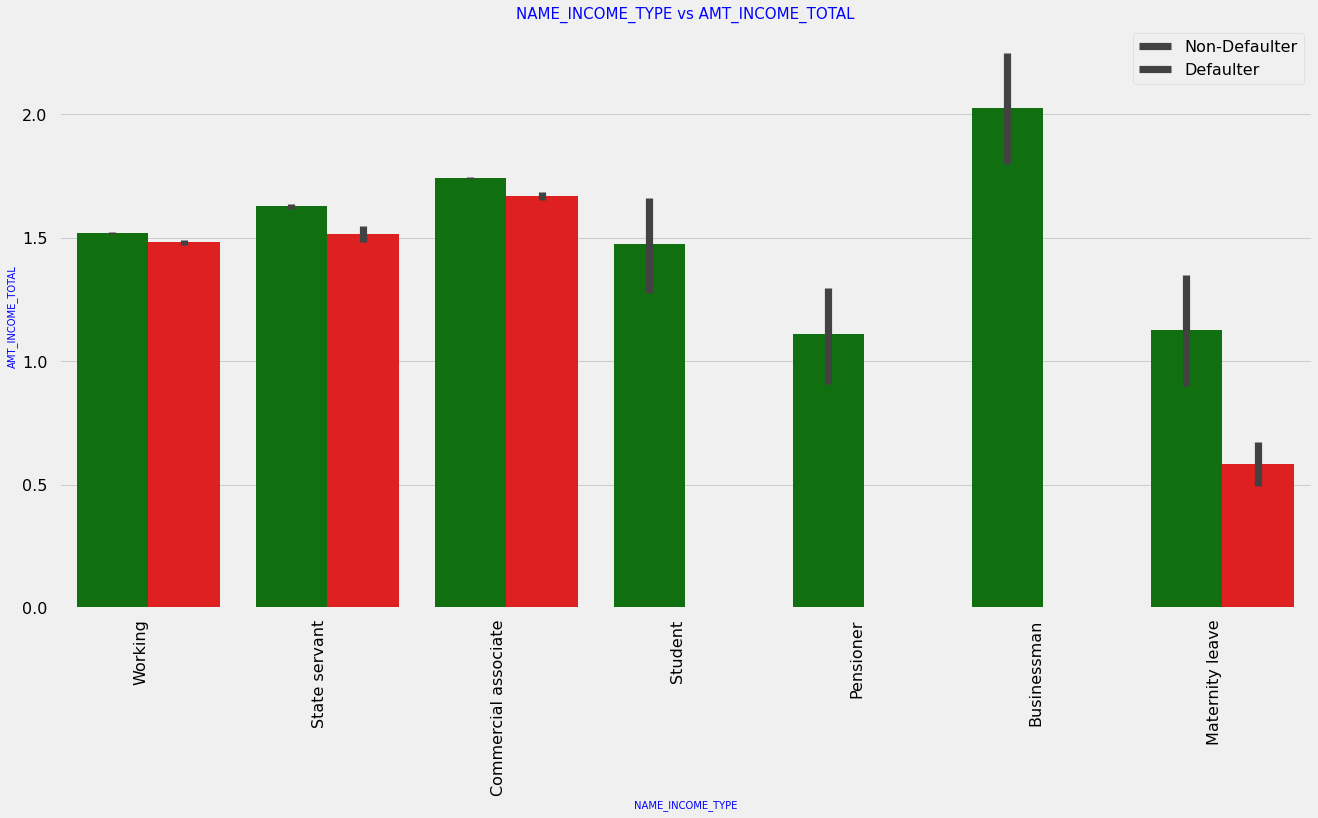

In [74]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE",
              "AMT_INCOME_TOTAL",
              df,
              "TARGET",
              (20,10))

#### Insight
It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 400K and slightly above 1M

### Numerical Analysis

In [75]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                        'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
                        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                        'REGION_POPULATION_RELATIVE', 'AGE', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 
                        'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
                        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
                        'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


non_defaulter_df = df.loc[df['TARGET']==0, cols_for_correlation] # Repayers
defaulter_df = df.loc[df['TARGET']==1, cols_for_correlation] # Defaulters

#### Correlation between numeric variable

In [76]:
# Getting the top 10 correlation for the Non-Defaulter data
corr_non_defaulter = non_defaulter_df.corr()
corr_non_defaulter = corr_non_defaulter.where(np.triu(np.ones(corr_non_defaulter.shape),k=1).astype(np.bool))

corr_non_defaulter_df = corr_non_defaulter.unstack().reset_index()
corr_non_defaulter_df.columns =['VAR1','VAR2','Correlation']
corr_non_defaulter_df.dropna(subset = ["Correlation"], inplace = True)
corr_non_defaulter_df["Correlation"] = corr_non_defaulter_df["Correlation"].abs() 
corr_non_defaulter_df.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_non_defaulter_df.head(10)

,VAR1,VAR2,Correlation
196,AMT_GOODS_PRICE,AMT_CREDIT,0.985932
461,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.949858
386,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892843
593,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.859793
692,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.819810
197,AMT_GOODS_PRICE,AMT_ANNUITY,0.768070
164,AMT_ANNUITY,AMT_CREDIT,0.766395
423,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.512627
455,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.511242
560,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.467645


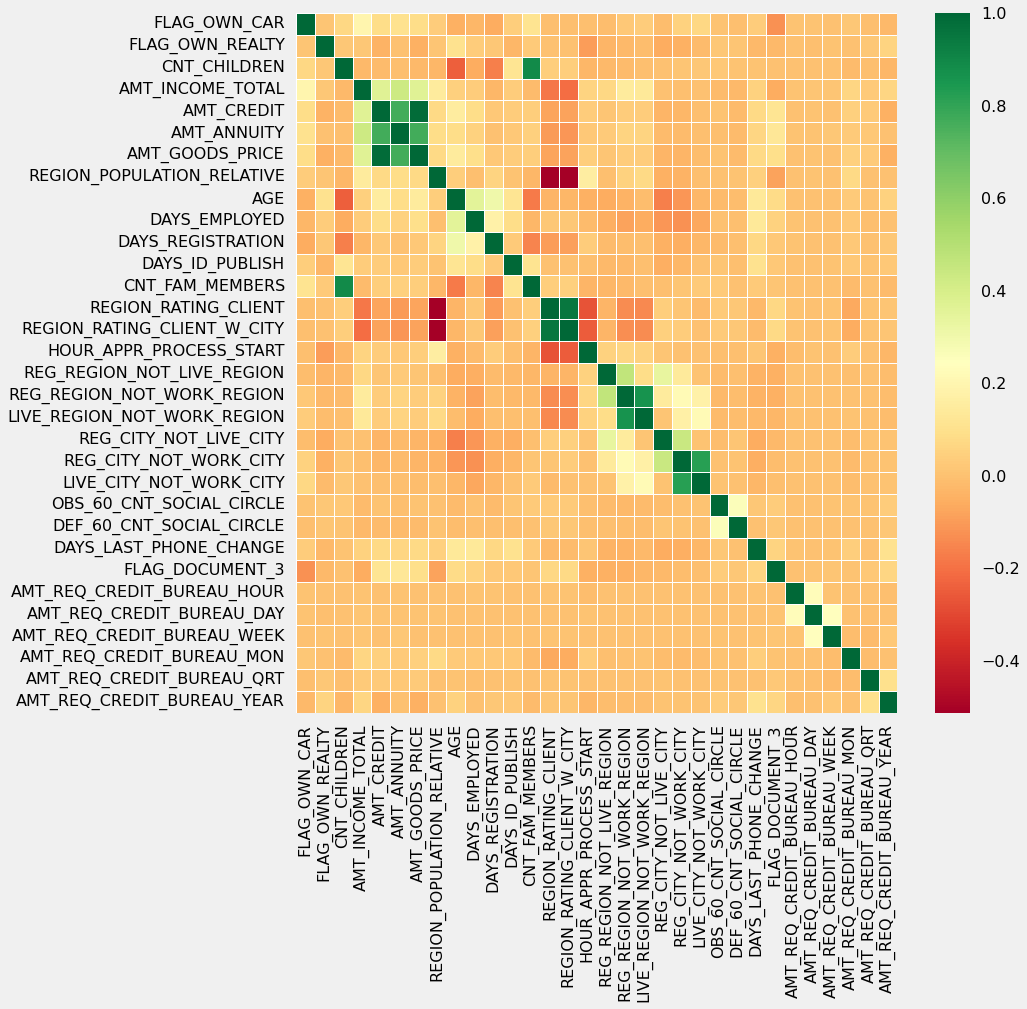

In [77]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(non_defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

#### Insight
- Correlating factors amongst Non-Defaulters.
- Credit amount is highly correlated with:
    - amount of goods price
    - loan annuity
    - total income

We can also see that Non-Defaulters have high correlation in number of days employed.

In [78]:
# Getting the top 10 correlation for the Defaulter data
corr_defaulter = defaulter_df.corr()
corr_defaulter = corr_defaulter.where(np.triu(np.ones(corr_defaulter.shape),k=1).astype(np.bool))
corr_defaulter_df = corr_defaulter.unstack().reset_index()
corr_defaulter_df.columns =['VAR1','VAR2','Correlation']
corr_defaulter_df.dropna(subset = ["Correlation"], inplace = True)
corr_defaulter_df["Correlation"] = corr_defaulter_df["Correlation"].abs()
corr_defaulter_df.sort_values(by='Correlation', ascending=False, inplace=True)
corr_defaulter_df.head(10)

,VAR1,VAR2,Correlation
196,AMT_GOODS_PRICE,AMT_CREDIT,0.981925
461,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.958070
386,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893615
593,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.846801
692,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.766851
164,AMT_ANNUITY,AMT_CREDIT,0.747459
197,AMT_GOODS_PRICE,AMT_ANNUITY,0.747061
560,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.509471
659,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.481013
455,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.430085


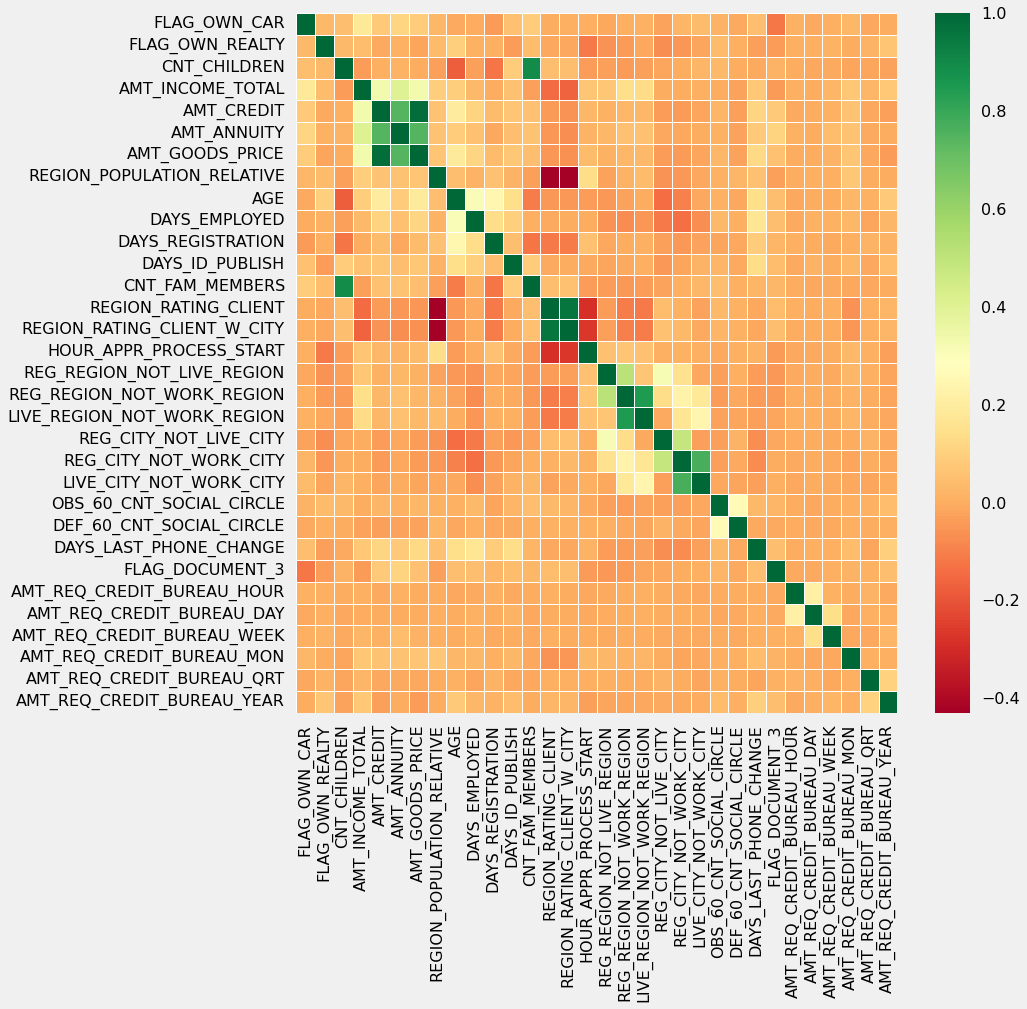

In [79]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

#### Insight
- Credit amount is highly correlated with amount of goods price which is same as non-defaulters.
- But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to non-defaulters(0.77)
- We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
- There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among non-defaulters.
- Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in non-defaulters.
- There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to non-defaulters(0.254)

### Processing previous application dataframe

### Analyze & Delete Irrelevant Columns in previous application prev_df

In [80]:
missing_prev_df = describe_missing_zeros_values(prev_df)
display(missing_prev_df)

Your selected dataframe has 1670214 rows 37 columns.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% Missing Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
RATE_INTEREST_PRIMARY,0,1664263,99.6,1664263,99.6,float64
RATE_INTEREST_PRIVILEGED,0,1664263,99.6,1664263,99.6,float64
AMT_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
RATE_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
NAME_TYPE_SUITE,0,820405,49.1,820405,49.1,object
DAYS_FIRST_DRAWING,0,673065,40.3,673065,40.3,float64
DAYS_FIRST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_LAST_DUE_1ST_VERSION,705,673065,40.3,673770,40.3,float64
DAYS_LAST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_TERMINATION,0,673065,40.3,673065,40.3,float64


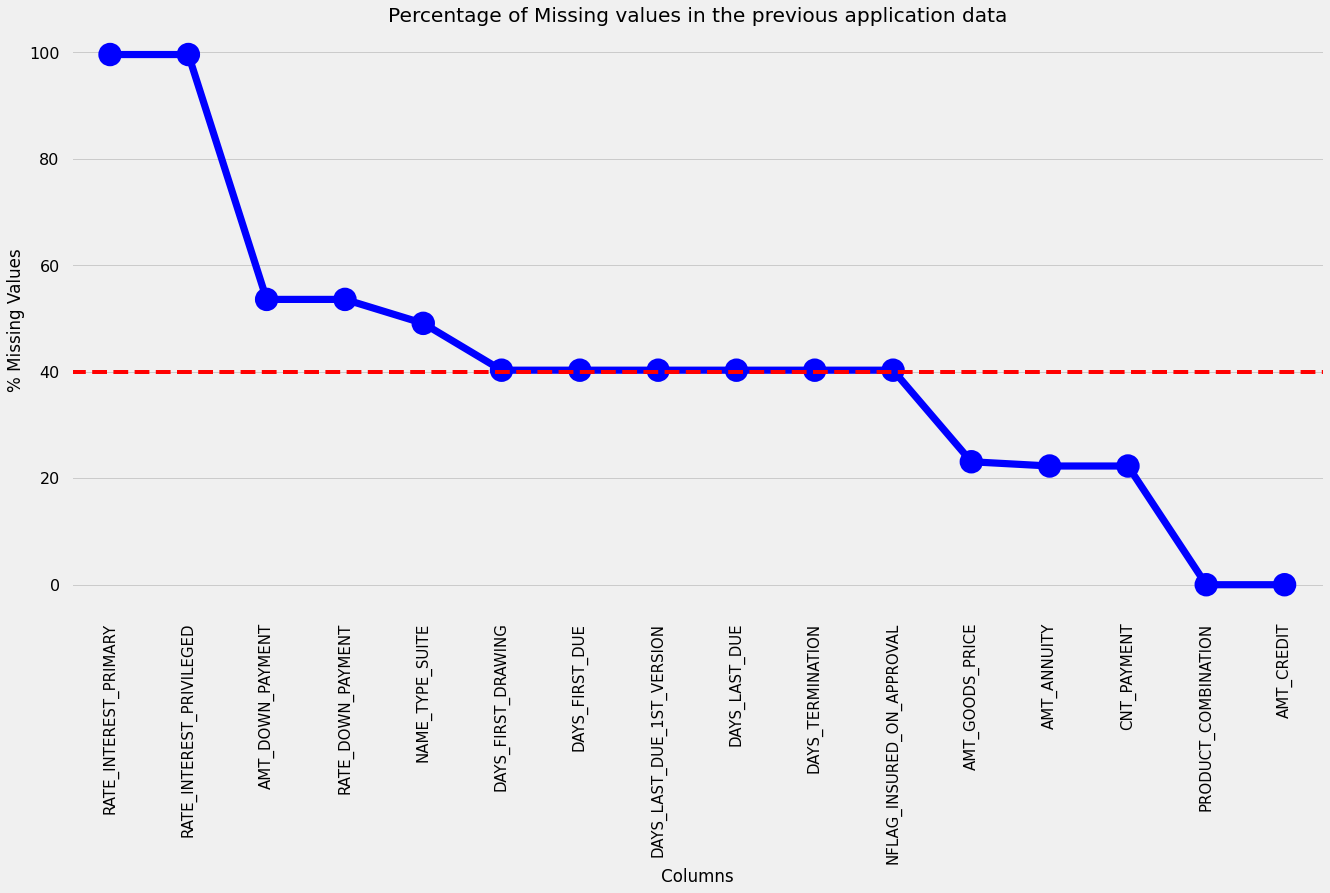

In [81]:
fig = plt.figure(figsize=(20,10))
ax = sns.pointplot(x = missing_prev_df.index,
                   y = "% Missing Values",
                   data = missing_prev_df,
                   color = 'blue')
plt.xticks(rotation=90, 
           fontsize =7)
ax.axhline(40, 
           ls ='--', 
           color = 'red')
plt.title("Percentage of Missing values in the previous application data")
plt.ylabel("% Missing Values")
plt.xlabel("Columns")
plt.xticks(fontsize=15, rotation=90)
plt.show()

In [82]:
missing_gt_thresh_prev_df = missing_prev_df[missing_prev_df["% Missing Values"] > threshold_missing_percent]
missing_gt_thresh_prev_df

,Zero Values,Missing Values,% Missing Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
RATE_INTEREST_PRIMARY,0,1664263,99.6,1664263,99.6,float64
RATE_INTEREST_PRIVILEGED,0,1664263,99.6,1664263,99.6,float64
AMT_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
RATE_DOWN_PAYMENT,369854,895844,53.6,1265698,75.8,float64
NAME_TYPE_SUITE,0,820405,49.1,820405,49.1,object
DAYS_FIRST_DRAWING,0,673065,40.3,673065,40.3,float64
DAYS_FIRST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_LAST_DUE_1ST_VERSION,705,673065,40.3,673770,40.3,float64
DAYS_LAST_DUE,0,673065,40.3,673065,40.3,float64
DAYS_TERMINATION,0,673065,40.3,673065,40.3,float64


In [83]:
# Getting the 11 columns which has more than 40% unknown
irrelevant_columns_prev = missing_gt_thresh_prev_df.index.tolist()
irrelevant_columns_prev

['RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [84]:
# Listing down columns which are not needed
unnecessary_columns_prev = ['WEEKDAY_APPR_PROCESS_START',
                            'HOUR_APPR_PROCESS_START',
                            'FLAG_LAST_APPL_PER_CONTRACT',
                            'NFLAG_LAST_APPL_IN_DAY']

In [85]:
irrelevant_columns_prev = irrelevant_columns_prev + unnecessary_columns_prev
print(f"Irrelevant colmuns to be removed: {len(irrelevant_columns_prev)}")

Irrelevant colmuns to be removed: 15


#### Insight
Total 15 columns can be deleted from prev_df

In [86]:
# Dropping the unnecessary columns from previous
prev_df.drop(labels=irrelevant_columns_prev,
             axis=1,
             inplace=True)

# Inspecting the dataframe after removal of unnecessary columns
print(f"Shape of Dataframe after removing irrelevant coluns: {prev_df.shape}")

Shape of Dataframe after removing irrelevant coluns: (1670214, 22)


#### Insight
After deleting unnecessary columns, there are 22 columns remaining in prev_df.

## Merging "application_data" dataframe and "previous_application" dataframe

In [87]:
# Merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(df, prev_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AGE_GROUP,AMT_CREDIT_RANGE,YEARS_EMPLOYED,EMPLOYMENT_YEAR_RANGE,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_GOODS_RATIO,ANNUITY_TO_INCOME_RATIO,CREDIT_TO_INCOME_RATIO,INCOME_TO_EMPLOYED_RATIO,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,637,3648,2120,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200K-300K,20-30,400K-500K,1,0-5,0.000165,0.000012,12197.777778,2.007889,0.003179,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,1188,1186,291,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200K-300K,40-50,Above 1M,3,0-5,0.000362,0.000011,13221.666667,4.790750,0.002273,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,1188,1186,291,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200K-300K,40-50,Above 1M,3,0-5,0.000362,0.000011,13221.666667,4.790750,0.002273,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,1188,1186,291,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200K-300K,40-50,Above 1M,3,0-5,0.000362,0.000011,13221.666667,4.790750,0.002273,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,1,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53.0,225,4260,2531,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Below 100K,Above 50,100K-200K,0,NaN,0.000200,0.000010,10000.000000,2.000000,0.003000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Ca

In [88]:
# Checking the details of the merged dataframe
loan_process_df.shape

(1072961, 77)

In [89]:
# Checking the columns and column types of the dataframe
loan_process_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072961 entries, 0 to 1072960
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1072961 non-null  int64   
 1   TARGET                       1072961 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1072961 non-null  object  
 3   CODE_GENDER                  1072961 non-null  object  
 4   FLAG_OWN_CAR                 1072961 non-null  int64   
 5   FLAG_OWN_REALTY              1072961 non-null  int64   
 6   CNT_CHILDREN                 1072961 non-null  int64   
 7   AMT_INCOME_TOTAL             1072961 non-null  float64 
 8   AMT_CREDIT_x                 1072961 non-null  float64 
 9   AMT_ANNUITY_x                1072868 non-null  float64 
 10  AMT_GOODS_PRICE_x            1071894 non-null  float64 
 11  NAME_TYPE_SUITE              1070176 non-null  object  
 12  NAME_INCOME_TYPE            

#### Bifurcating the loan process dataframe based on Target value 0 and 1 for correlation and other analysis

In [90]:
# Bifurcating the loan process dataframe based on Target value 0 and 1 for correlation and other analysis

loan_non_defaulters_df = loan_process_df[loan_process_df['TARGET']==0] # Non-Defaulters
loan_defaulters_df = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

### Plotting Contract Status vs Purpose of the loan

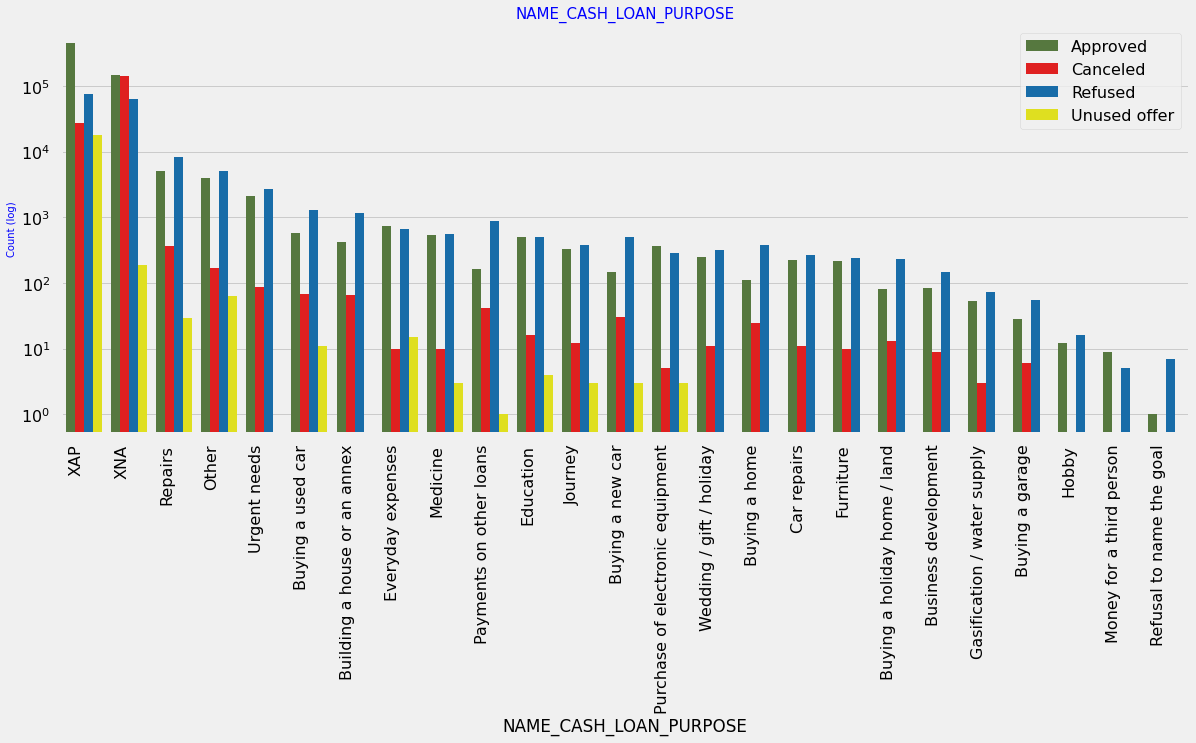

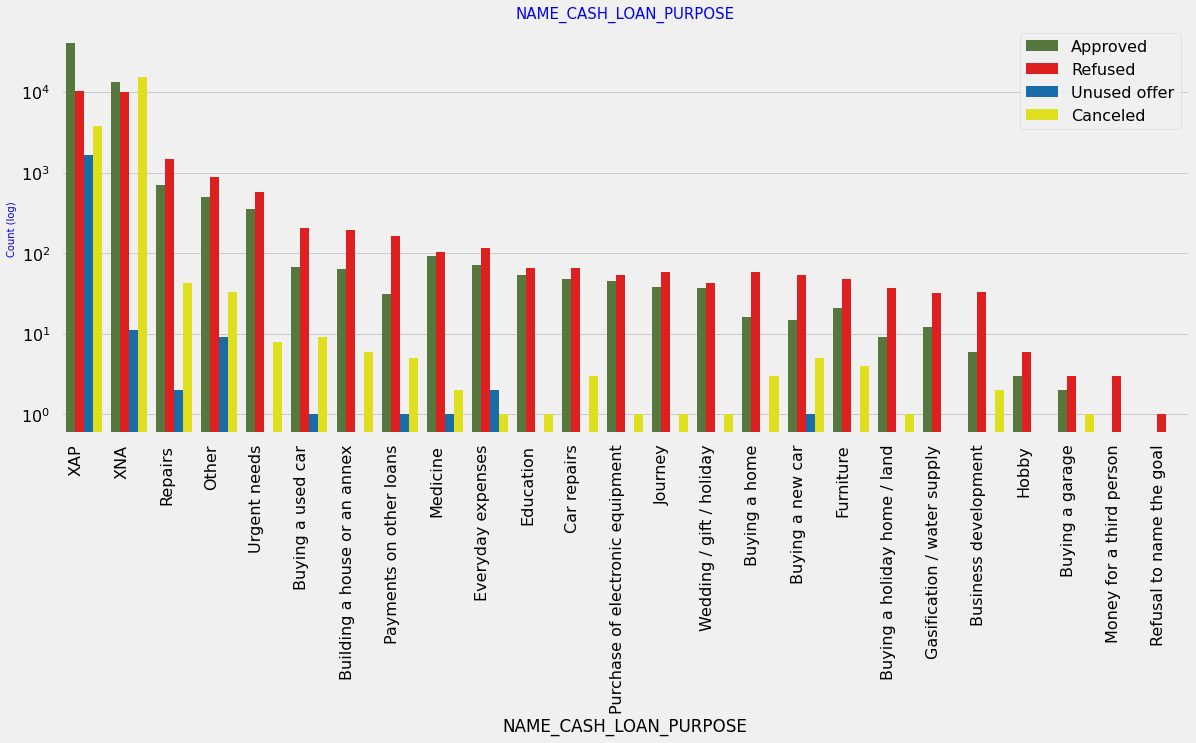

In [91]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",
                  loan_non_defaulters_df,
                  "NAME_CONTRACT_STATUS",
                  ["#548235", "#FF0000", "#0070C0", "#FFFF00"],
                  True,
                  (18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",
                  loan_defaulters_df,
                  "NAME_CONTRACT_STATUS",
                  ["#548235", "#FF0000", "#0070C0", "#FFFF00"],
                  True,
                  (18,7))

#### Insight
- Loan purpose has high number of unknown values (XAP, XNA)
- Loan taken for the purpose of Repairs seems to have highest default rate
- A very high number application have been rejected by bank or refused by client which has purpose as repair or other. 
- This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

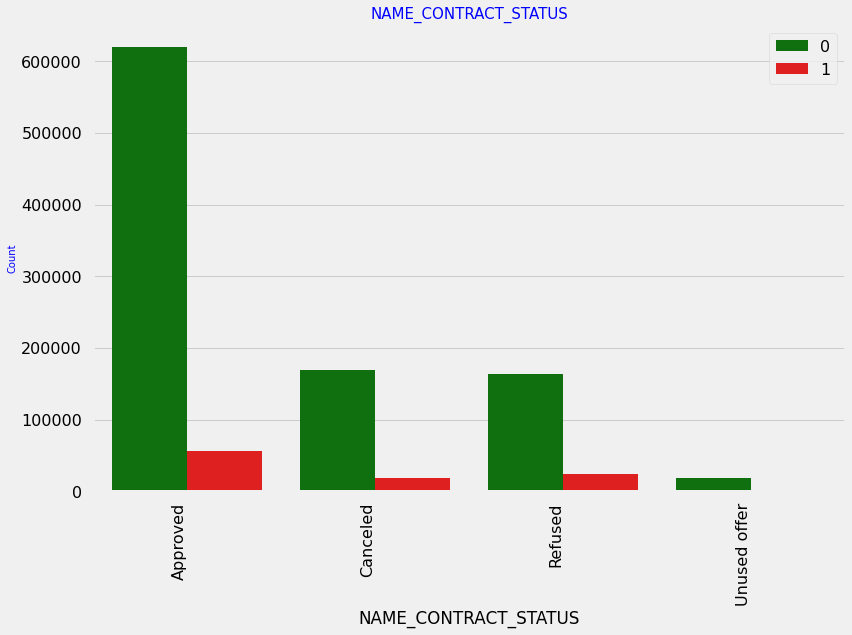

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       619965     91.74%
                     1        55811      8.26%
Canceled             0       169752     89.79%
                     1        19298     10.21%
Refused              0       163720     86.94%
                     1        24590     13.06%
Unused offer         0        18138     91.49%
                     1         1687      8.51%


In [92]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS", 
                  loan_process_df, 
                  "TARGET", 
                  ['g','r'],
                  False,(12,8))

g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),
                 round(g.value_counts(normalize=True).mul(100),2)],
                axis=1, 
                keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

#### Insight
- 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
- 88% of the clients who have been previously refused a loan has payed back the loan in current case.
- Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

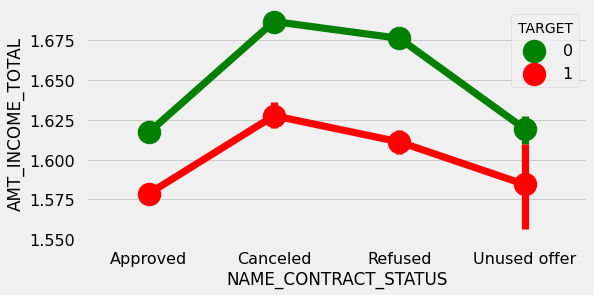

In [93]:
# Plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS", 'AMT_INCOME_TOTAL')

#### Insight
The point plot show that the people who have canceled or refused offer earlier have defaulted even when there average income is higher than others

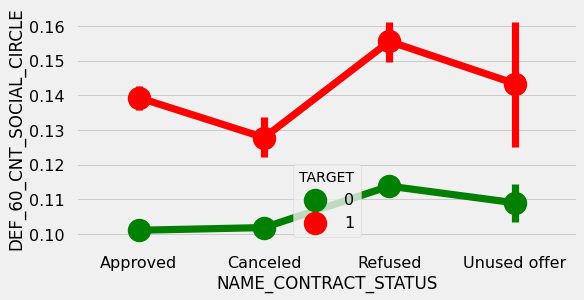

In [94]:
# Plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS", 'DEF_60_CNT_SOCIAL_CIRCLE')

#### Insight
Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.